## Knowledge Discovery in Databases (KDD)


# Data Selection


Connecting to Google Drive (Cloud service to storage and share our files)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_squared_log_error, explained_variance_score, max_error
)
from mlxtend.evaluate import bias_variance_decomp
from xgboost import XGBRegressor



Creating parameters to avoid using a full file path, and ensuring that if the content of the file is updated, it will be synchronized with the update

In [ ]:
housing = "/content/drive/MyDrive/ML_Project_DBs/PPR dbs.csv"
finances = "/content/drive/MyDrive/ML_Project_DBs/index.csv"
crime = "/content/drive/MyDrive/ML_Project_DBs/crime.csv"
inmmigration = "/content/drive/MyDrive/ML_Project_DBs/immigration_final.csv"
unemployment = "/content/drive/MyDrive/ML_Project_DBs/unemployment_final.csv"
housing_build = '/content/drive/MyDrive/ML_Project_DBs/housing_builds.csv'

# Preprocesing

Creating pandas DataFrames

In [ ]:
housing_df = pd.read_csv(housing)
finances_df = pd.read_csv(finances)
crime_df = pd.read_csv(crime)
migration_df = pd.read_csv(inmmigration)
unemployment_df = pd.read_csv(unemployment)
availability_df = pd.read_csv(housing_build)

<ipython-input-179-f5677df2a5e9>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_df = pd.read_csv(housing)


Exploring Data types



In [ ]:
print ("housing")
house = housing_df.dtypes
print(house)
print (" ")
print ("finances")
fin = finances_df.dtypes
print (fin)
print (" ")
print ("crime")
cri = crime_df.dtypes
print (cri)
print (" ")
print ("migration")
mig = migration_df.dtypes
print(mig)
print (" ")
print ("unemployment")
une = unemployment_df.dtypes
print (une)
print (" ")
print ("availability")
ava = availability_df.dtypes
print (ava)

housing
Date of Sale (dd/mm/yyyy)    object
Address                      object
County                       object
Eircode                      object
Price (€)                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object
 
finances
Date                 object
TSX Adj Close       float64
FTSE Adj Close      float64
NIKKEI Adj Close    float64
VWO Adj Close       float64
KOSDAQ Adj Close    float64
BCOM Adj Close      float64
GLAB.L Adj Close    float64
VIX Adj Close       float64
dtype: object
 
crime
Unnamed: 0     int64
Date          object
Crime type    object
County        object
Amount         int64
dtype: object
 
migration
Unnamed: 0      int64
Year            int64
County         object
VALUE         float64
dtype: object
 
unemployment
Unnamed: 0      int64
Year            int64
County         object
VALUE         float64
dtype: object
 
availability
STAT

 Exploring datasets

In [ ]:
housing_df.head(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,1/1/2019,"11 ARD CRANA, BUNCRANA, LIFFORD",Donegal,NaN,"47,400.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,1/1/2019,"2 FAIRGREEN LANE, BOLTON, CALLAN",Kilkenny,NaN,"60,671.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
2,1/1/2019,"2 LEIX RD, CABRA, DUBLIN 7",Dublin,NaN,"30,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
3,1/1/2019,"2 WOODALE VIEW, BALLYCULLEN, FIRHOUSE DUBLIN 24",Dublin,NaN,"30,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
4,1/1/2019,"34 MITCHELL ST, DUNGARVAN, WATERFORD",Waterford,NaN,"130,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [ ]:
finances_df.head(5)

,Date,TSX Adj Close,FTSE Adj Close,NIKKEI Adj Close,VWO Adj Close,KOSDAQ Adj Close,BCOM Adj Close,GLAB.L Adj Close,VIX Adj Close
0,2019-08-01,"16,377.00","7,584.90","21,540.99",35.09,622.26,77.01,31.41,17.87
1,2019-08-02,"16,271.70","7,407.10","21,087.16",34.75,615.70,77.23,31.54,17.61
2,2019-08-05,NaN,"7,223.90","20,720.29",33.53,569.79,76.76,31.56,24.59
3,2019-08-06,"16,149.50","7,171.70","20,585.31",34.06,551.50,76.47,31.62,20.17
4,2019-08-07,"16,265.20","7,198.70","20,516.56",34.20,564.64,75.97,31.74,19.49


In [ ]:
crime_df.head(5)

,Unnamed: 0,Date,Crime type,County,Amount
0,0,2003Q1,Crimes affecting personal safety,Carlow,241
1,1,2003Q1,Crimes affecting personal safety,Cavan,288
2,2,2003Q1,Crimes affecting personal safety,Clare,419
3,3,2003Q1,Crimes affecting personal safety,Cork,2034
4,4,2003Q1,Crimes affecting personal safety,Donegal,884


In [ ]:
migration_df.head(5)

,Unnamed: 0,Year,County,VALUE
0,0,2003,Carlow,8.40
1,1,2004,Carlow,8.60
2,2,2005,Carlow,14.60
3,3,2006,Carlow,18.40
4,4,2007,Carlow,10.60


In [ ]:
unemployment_df.head(5)

,Unnamed: 0,Year,County,VALUE
0,0,2003,Carlow,10.80
1,1,2004,Carlow,10.50
2,2,2005,Carlow,10.30
3,3,2006,Carlow,10.40
4,4,2007,Carlow,10.80


In [ ]:
availability_df.head(5)

,STATISTIC Label,Quarter,Local Authority,UNIT,VALUE
0,New Dwelling Completion,2011Q1,Cork City Council,Number,39
1,New Dwelling Completion,2011Q1,Clare County Council,Number,52
2,New Dwelling Completion,2011Q1,Cavan County Council,Number,61
3,New Dwelling Completion,2011Q1,Cork County Council,Number,168
4,New Dwelling Completion,2011Q1,Carlow County Council,Number,17


## Standarizing Data Sets

Deleting extra blank spaces, converting labels to lowercase, renaming columns, changing data types, adding columns to standardize the data, and modifying and aggregating data

### Housing

In [ ]:
housing_df.columns = housing_df.columns.str.strip() ## Deleting extra blank spaces
housing_df.columns = housing_df.columns.str.lower() ## labels in lower case
housing_df = housing_df.rename(columns={
    'date of sale (dd/mm/yyyy)': 'date',
    'price (€)': 'price'
}) ### Changing collumns name
new_housing = housing_df.copy()  # Making a copy to avoid modifying the original

new_housing['date'] = pd.to_datetime(new_housing['date']) ### applying date time to date column
new_housing['price'] = (
    new_housing['price']
    .str.replace(',', '')
    .astype(float)
) ### Transforming values in price
new_housing['month'] = new_housing['date'].dt.month ## extracting month
new_housing['year'] = new_housing['date'].dt.year ### extracting year
new_housing['price'] = new_housing['price'].round(2) ### rouding prices
new_housing['description of property'] = new_housing['description of property'].replace(
    'Teach/Árasán Cónaithe Nua', 'New Dwelling house /Apartment'
)
new_housing.loc[new_housing['description of property'] == 'Teach/Árasán Cónaithe Atháimhe', 'county'] = 'Westmeath'
new_housing['description of property'] = new_housing['description of property'].replace(
    'Teach/Árasán Cónaithe Atháimhe', 'Second-Hand Dwelling house /Apartment'
) ### During exploration we have seen that some categories are not in english

new_housing = new_housing.dropna(subset=['price', 'county', 'date', 'description of property']) ### excluding null values

new_housing.head(5)


,date,address,county,eircode,price,not full market price,vat exclusive,description of property,property size description,month,year
0,2019-01-01,"11 ARD CRANA, BUNCRANA, LIFFORD",Donegal,NaN,"47,400.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2019
1,2019-01-01,"2 FAIRGREEN LANE, BOLTON, CALLAN",Kilkenny,NaN,"60,671.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2019
2,2019-01-01,"2 LEIX RD, CABRA, DUBLIN 7",Dublin,NaN,"30,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2019
3,2019-01-01,"2 WOODALE VIEW, BALLYCULLEN, FIRHOUSE DUBLIN 24",Dublin,NaN,"30,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN,1,2019
4,2019-01-01,"34 MITCHELL ST, DUNGARVAN, WATERFORD",Waterford,NaN,"130,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN,1,2019


In [ ]:
new_housing['county'].unique() ## Checking all counties in the DataFrame

array(['Donegal', 'Kilkenny', 'Dublin', 'Waterford', 'Cork', 'Westmeath',
       'Offaly', 'Kildare', 'Kerry', 'Meath', 'Limerick', 'Galway',
       'Wicklow', 'Clare', 'Wexford', 'Longford', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Louth', 'Tipperary', 'Cavan', 'Monaghan',
       'Carlow', 'Laois'], dtype=object)

In [ ]:
new_housing.describe() ## Describe function for a quick overview of the data

,date,price,month,year
count,333753,"333,753.00","333,753.00","333,753.00"
mean,2021-12-12 04:46:56.420526080,"353,937.60",6.81,"2,021.42"
min,2019-01-01 00:00:00,"5,001.00",1.00,"2,019.00"
25%,2020-08-11 00:00:00,"180,000.00",4.00,"2,020.00"
50%,2021-12-21 00:00:00,"272,000.00",7.00,"2,021.00"
75%,2023-05-12 00:00:00,"383,259.91",10.00,"2,023.00"
max,2024-09-27 00:00:00,"225,000,000.00",12.00,"2,024.00"
std,NaN,"1,305,669.87",3.42,1.64


In [ ]:
new_housing.dtypes ## Checking changes

,0
date,datetime64[ns]
address,object
county,object
eircode,object
price,float64
not full market price,object
vat exclusive,object
description of property,object
property size description,object
month,int32


### Finances

In [ ]:
f_new_df = finances_df.copy()
f_new_df.columns = f_new_df.columns.str.lower()
f_new_df['date'] = pd.to_datetime(f_new_df['date'])
f_new_df['month'] = f_new_df['date'].dt.month
f_new_df['year'] = f_new_df['date'].dt.year
f_new_df[['tsx adj close', 'ftse adj close', 'nikkei adj close',
           'vwo adj close', 'kosdaq adj close', 'bcom adj close',
           'glab.l adj close', 'vix adj close', 'month', 'year']] = \
    f_new_df[['tsx adj close', 'ftse adj close', 'nikkei adj close',
               'vwo adj close', 'kosdaq adj close', 'bcom adj close',
               'glab.l adj close', 'vix adj close', 'month', 'year']].ffill() ### Null values filled with the closing price from the previous day.
f_new_df.head(5)

,date,tsx adj close,ftse adj close,nikkei adj close,vwo adj close,kosdaq adj close,bcom adj close,glab.l adj close,vix adj close,month,year
0,2019-08-01,"16,377.00","7,584.90","21,540.99",35.09,622.26,77.01,31.41,17.87,8,2019
1,2019-08-02,"16,271.70","7,407.10","21,087.16",34.75,615.70,77.23,31.54,17.61,8,2019
2,2019-08-05,"16,271.70","7,223.90","20,720.29",33.53,569.79,76.76,31.56,24.59,8,2019
3,2019-08-06,"16,149.50","7,171.70","20,585.31",34.06,551.50,76.47,31.62,20.17,8,2019
4,2019-08-07,"16,265.20","7,198.70","20,516.56",34.20,564.64,75.97,31.74,19.49,8,2019


In [ ]:
f_new_df.describe() # quick overview of the data

,date,tsx adj close,ftse adj close,nikkei adj close,vwo adj close,kosdaq adj close,bcom adj close,glab.l adj close,vix adj close,month,year
count,1302,"1,302.00","1,302.00","1,302.00","1,302.00","1,302.00","1,302.00","1,302.00","1,302.00","1,302.00","1,302.00"
mean,2022-01-30 13:09:40.645161216,"19,156.31","7,188.27","28,226.71",40.45,832.70,95.40,29.93,21.13,6.54,"2,021.58"
min,2019-08-01 00:00:00,"11,228.50","4,993.90","16,552.83",26.78,428.35,59.48,26.57,11.54,1.00,"2,019.00"
25%,2020-10-30 18:00:00,"17,417.50","6,969.73","24,033.83",37.85,743.65,79.13,27.82,15.30,4.00,"2,020.00"
50%,2022-01-31 12:00:00,"19,813.35","7,328.40","27,820.04",39.47,847.62,98.90,30.85,19.36,7.00,"2,022.00"
75%,2023-05-01 18:00:00,"20,680.48","7,582.88","30,231.25",44.12,916.20,106.13,31.82,24.76,10.00,"2,023.00"
max,2024-07-31 00:00:00,"23,110.80","8,445.80","42,224.02",50.67,"1,060.00",136.61,32.59,82.69,12.00,"2,024.00"
std,NaN,"2,168.89",631.35,"5,077.81",4.54,123.93,17.84,2.04,8.30,3.44,1.50


In [ ]:
f_new_df.dtypes ## Checking changes

,0
date,datetime64[ns]
tsx adj close,float64
ftse adj close,float64
nikkei adj close,float64
vwo adj close,float64
kosdaq adj close,float64
bcom adj close,float64
glab.l adj close,float64
vix adj close,float64
month,int32


### Crime

In [ ]:
crime_new_df = crime_df.copy()
crime_new_df.columns = crime_new_df.columns.str.lower()
crime_new_df.dropna(subset= ['amount','county'])
crime_new_df['date'] = pd.to_datetime(crime_new_df['date'])
crime_new_df['month'] = crime_new_df['date'].dt.month ## extracting month
crime_new_df['year'] = crime_new_df['date'].dt.year ### extracting year


<ipython-input-194-8079cf2b16cb>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_new_df['date'] = pd.to_datetime(crime_new_df['date'])


In [ ]:
crime_new_df.head(10) ## Exploring modified dataset

,unnamed: 0,date,crime type,county,amount,month,year
0,0,2003-01-01,Crimes affecting personal safety,Carlow,241,1,2003
1,1,2003-01-01,Crimes affecting personal safety,Cavan,288,1,2003
2,2,2003-01-01,Crimes affecting personal safety,Clare,419,1,2003
3,3,2003-01-01,Crimes affecting personal safety,Cork,2034,1,2003
4,4,2003-01-01,Crimes affecting personal safety,Donegal,884,1,2003
5,5,2003-01-01,Crimes affecting personal safety,Dublin,7012,1,2003
6,6,2003-01-01,Crimes affecting personal safety,Galway,876,1,2003
7,7,2003-01-01,Crimes affecting personal safety,Kerry,496,1,2003
8,8,2003-01-01,Crimes affecting personal safety,Kildare,709,1,2003
9,9,2003-01-01,Crimes affecting personal safety,Kilkenny,241,1,2003


In [ ]:
crime_new_df.dtypes ## Checking changes

,0
unnamed: 0,int64
date,datetime64[ns]
crime type,object
county,object
amount,int64
month,int32
year,int32


### Migration

In [ ]:
immi_new_df = migration_df.copy()
immi_new_df.columns = immi_new_df.columns.str.lower()
immi_new_df.dropna()
immi_new_df = immi_new_df.dropna(subset=['county', 'value'])
immi_new_df['county'].unique() ## Checking all counties in the DataFrame

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow'], dtype=object)

### Unemployment

In [ ]:
unemp_new_df = unemployment_df.copy()
unemp_new_df.columns = unemp_new_df.columns.str.lower()
unemp_new_df = unemp_new_df.dropna(subset=['county', 'value'])
unemp_new_df['county'].unique() ## Checking all counties in the DataFrame

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow'], dtype=object)

In [ ]:
unemp_new_df.head(5)  ## Exploring modified dataset

,unnamed: 0,year,county,value
0,0,2003,Carlow,10.80
1,1,2004,Carlow,10.50
2,2,2005,Carlow,10.30
3,3,2006,Carlow,10.40
4,4,2007,Carlow,10.80


### Availability

In [ ]:
new_build_df = availability_df.copy()

# First, separate the year and quarter
new_build_df['Year'] = new_build_df['Quarter'].str[:4]  # Extract the year
new_build_df['Quarter'] = new_build_df['Quarter'].str[-2:]  # Extract the quarter

# Create a mapping of quarters to corresponding months
quarter_to_months = {
    'Q1': [1, 2, 3],
    'Q2': [4, 5, 6],
    'Q3': [7, 8, 9],
    'Q4': [10, 11, 12]
}

# Expand the data so that each quarter is represented by its corresponding months
expanded_rows = []

for _, row in new_build_df.iterrows():
    year = int(row['Year'])
    quarter = row['Quarter']
    months = quarter_to_months[quarter]

    # Evenly distribute the VALUE across the months
    monthly_value = row['VALUE'] / 3

    for month in months:
        new_row = row.copy()
        new_row['Month'] = month
        new_row['Year'] = year
        new_row['VALUE'] = monthly_value
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
builts_monthly_df = pd.DataFrame(expanded_rows)

# Create ava_houses_df with lowercased column names
ava_houses_df = builts_monthly_df.copy()
ava_houses_df.columns = ava_houses_df.columns.str.lower()

# Display the first few rows to confirm the transformation
ava_houses_df = ava_houses_df.dropna(subset=['local authority', 'value'])
ava_houses_df = ava_houses_df.rename(columns={'local authority': 'county'})
ava_houses_df['county'] = ava_houses_df['county'].str.replace(' City Council', '', regex=False)
ava_houses_df['county'] = ava_houses_df['county'].str.replace(' County Council', '', regex=False)
ava_houses_df['county'] = ava_houses_df['county'].replace('Dún Laoghaire Rathdown', 'Dublin')
ava_houses_df['county'] = ava_houses_df['county'].str.replace('&', '', regex=False)
ava_houses_df['county'] = ava_houses_df['county'].str.replace('City', '', regex=False)
ava_houses_df['county'] = ava_houses_df['county'].replace({
    'South Dublin': 'Dublin',
    'Fingal': 'Dublin'
})
ava_houses_df['county'] = ava_houses_df['county'].str.strip()
ava_houses_df['county'].unique()


array(['Cork', 'Clare', 'Cavan', 'Carlow', 'Dublin', 'Donegal', 'Galway',
       'Kildare', 'Kilkenny', 'Kerry', 'Longford', 'Louth', 'Limerick',
       'Leitrim', 'Laois', 'Meath', 'Monaghan', 'Mayo', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wicklow', 'Wexford'], dtype=object)

In [ ]:
ava_houses_df.dtypes ## Checking changes

,0
statistic label,object
quarter,object
county,object
unit,object
value,float64
year,int64
month,int64


###INDEX

Exploring DF

In [ ]:
mth_mean_df.describe() #

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label
count,"238,708.00","238,708.00","238,708.00","238,708.00","238,708.00","238,708.00","238,708.00","238,708.00","238,708.00"
mean,32.93,10.28,1.79,"364,605.57","5,633.15",332.91,0.76,0.71,1.12
std,17.43,6.99,0.41,"266,436.74","13,809.42",352.42,0.35,0.12,1.11
min,1.00,1.00,1.00,"150,000.00",0.00,2.00,0.17,0.55,0.00
25%,18.00,6.00,2.00,"226,000.00",0.00,57.00,0.58,0.64,0.00
50%,34.00,6.00,2.00,"300,000.00",0.00,178.00,0.70,0.68,1.00
75%,48.00,15.00,2.00,"405,000.00","2,144.00",544.00,1.00,0.75,2.00
max,60.00,26.00,2.00,"4,000,000.00","50,176.00","1,390.00",2.56,1.23,3.00


In [ ]:
f_new_df.head()

,date,tsx adj close,ftse adj close,nikkei adj close,vwo adj close,kosdaq adj close,bcom adj close,glab.l adj close,vix adj close,month,year
0,2019-08-01,"16,377.00","7,584.90","21,540.99",35.09,622.26,77.01,31.41,17.87,8,2019
1,2019-08-02,"16,271.70","7,407.10","21,087.16",34.75,615.70,77.23,31.54,17.61,8,2019
2,2019-08-05,"16,271.70","7,223.90","20,720.29",33.53,569.79,76.76,31.56,24.59,8,2019
3,2019-08-06,"16,149.50","7,171.70","20,585.31",34.06,551.50,76.47,31.62,20.17,8,2019
4,2019-08-07,"16,265.20","7,198.70","20,516.56",34.20,564.64,75.97,31.74,19.49,8,2019


Excluding  2024 data

In [ ]:
f_exc = f_new_df[f_new_df['year'] != 2024]
f_exc

,date,tsx adj close,ftse adj close,nikkei adj close,vwo adj close,kosdaq adj close,bcom adj close,glab.l adj close,vix adj close,month,year
0,2019-08-01,"16,377.00","7,584.90","21,540.99",35.09,622.26,77.01,31.41,17.87,8,2019
1,2019-08-02,"16,271.70","7,407.10","21,087.16",34.75,615.70,77.23,31.54,17.61,8,2019
2,2019-08-05,"16,271.70","7,223.90","20,720.29",33.53,569.79,76.76,31.56,24.59,8,2019
3,2019-08-06,"16,149.50","7,171.70","20,585.31",34.06,551.50,76.47,31.62,20.17,8,2019
4,2019-08-07,"16,265.20","7,198.70","20,516.56",34.20,564.64,75.97,31.74,19.49,8,2019
...,...,...,...,...,...,...,...,...,...,...,...
1145,2023-12-25,"20,881.20","7,697.50","33,254.03",39.95,854.62,99.35,28.39,13.03,12,2023
1146,2023-12-26,"20,881.20","7,697.50","33,305.85",40.21,848.34,99.91,28.39,12.99,12,2023
1147,2023-12-27,"21,015.90","7,725.00","33,681.24",40.43,859.79,100.13,28.45,12.43,12,2023
1148,2023-12-28,"20,929.40","7,722.70","33,539.62",40.67,866.57,99.57,28.44,12.47,12,2023


# Data Transformation

##Housing

Creating a map_class

In [ ]:
new_housing.head(5)
hs_df = new_housing[['month', 'year', 'county', 'price','description of property']]
hs_df ## Creating a copy of the main dataset to work on and apply transformation

,month,year,county,price,description of property
0,1,2019,Donegal,"47,400.00",Second-Hand Dwelling house /Apartment
1,1,2019,Kilkenny,"60,671.00",Second-Hand Dwelling house /Apartment
2,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment
3,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment
4,1,2019,Waterford,"130,000.00",Second-Hand Dwelling house /Apartment
...,...,...,...,...,...
333748,9,2024,Laois,"550,000.00",Second-Hand Dwelling house /Apartment
333749,9,2024,Donegal,"40,000.00",Second-Hand Dwelling house /Apartment
333750,9,2024,Limerick,"205,000.00",Second-Hand Dwelling house /Apartment
333751,9,2024,Tipperary,"400,000.00",Second-Hand Dwelling house /Apartment


Mapping county and property description columns

In [ ]:
unique_counties = hs_df['county'].unique()
sorted_counties = sorted(unique_counties)
county_mapping = {county: idx + 1 for idx, county in enumerate(sorted_counties)}

hs_df['county_number'] = hs_df['county'].map(county_mapping)

description_mapping = {desc: idx + 3 for idx, desc in enumerate(hs_df['description of property'].unique())}
description_mapping['New Dwelling house /Apartment'] = 1
description_mapping['Second-Hand Dwelling house /Apartment'] = 2

hs_df['description_number'] = hs_df['description of property'].map(description_mapping)

hs_df


<ipython-input-206-d8d9a316b389>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_df['county_number'] = hs_df['county'].map(county_mapping)
<ipython-input-206-d8d9a316b389>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs_df['description_number'] = hs_df['description of property'].map(description_mapping)


,month,year,county,price,description of property,county_number,description_number
0,1,2019,Donegal,"47,400.00",Second-Hand Dwelling house /Apartment,5,2
1,1,2019,Kilkenny,"60,671.00",Second-Hand Dwelling house /Apartment,10,2
2,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment,6,2
3,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment,6,2
4,1,2019,Waterford,"130,000.00",Second-Hand Dwelling house /Apartment,23,2
...,...,...,...,...,...,...,...
333748,9,2024,Laois,"550,000.00",Second-Hand Dwelling house /Apartment,11,2
333749,9,2024,Donegal,"40,000.00",Second-Hand Dwelling house /Apartment,5,2
333750,9,2024,Limerick,"205,000.00",Second-Hand Dwelling house /Apartment,13,2
333751,9,2024,Tipperary,"400,000.00",Second-Hand Dwelling house /Apartment,22,2


In [ ]:
description_df = pd.DataFrame(list(description_mapping.items()), columns=['Description', 'Description Number'])
description_df #Creating a separate DataFrame to store as a mapping dictionary

,Description,Description Number
0,Second-Hand Dwelling house /Apartment,2
1,New Dwelling house /Apartment,1


In [ ]:
county_df = pd.DataFrame(list(county_mapping.items()), columns=['County', 'County Number'])
county_df
#Creating a separate DataFrame to store as a mapping dictionary

,County,County Number
0,Carlow,1
1,Cavan,2
2,Clare,3
3,Cork,4
4,Donegal,5
5,Dublin,6
6,Galway,7
7,Kerry,8
8,Kildare,9
9,Kilkenny,10


## Crime

In [ ]:
crime_test = crime_new_df[crime_new_df['county']== 'Carlow']
crime_test = crime_test.groupby(['month', 'year', 'county'])['amount'].sum().reset_index()
crime_test = crime_test[crime_test['year'] == 2019]
crime_test ### checking if all months contains at least one record

,month,year,county,amount
16,1,2019,Carlow,1227
38,4,2019,Carlow,1274
60,7,2019,Carlow,1284
81,10,2019,Carlow,1259


Some months do not have any values for certain counties, so 0 is added for those

In [ ]:
crm_df = crime_new_df[['month', 'year', 'county', 'amount']]
crm_df = crm_df.groupby(['month', 'year', 'county'])['amount'].sum().reset_index()
crm_df = crm_df[crm_df['year'].isin([2019, 2020, 2021, 2022, 2023, 2024])]

all_months = pd.Series(range(1, 13))
years = crm_df['year'].unique()
counties = crm_df['county'].unique()
crm_df.rename(columns={'amount': 'total_crimes'}, inplace=True)
complete_index = pd.MultiIndex.from_product([all_months, years, counties], names=['month', 'year', 'county'])
crm_df = crm_df.set_index(['month', 'year', 'county']).reindex(complete_index, fill_value=0).reset_index()

crm_df.head(5)

,month,year,county,total_crimes
0,1,2019,Carlow,1227
1,1,2019,Cavan,1230
2,1,2019,Clare,1614
3,1,2019,Cork,9451
4,1,2019,Donegal,2458


##Avalability

Adding 0s in case there are locations with no new houses

In [ ]:
ava_df = ava_houses_df[['month', 'year', 'county', 'value']].rename(columns={'value': 'new_houses'})
ava_df = ava_df[ava_df['year'].isin([2019, 2020, 2021, 2022, 2023, 2024])]
ava_df = ava_df.groupby(['month', 'year', 'county'])['new_houses'].sum().round(0).reset_index()
years = [2019, 2020, 2021, 2022, 2023,2024]
months = list(range(1, 13))
counties = ava_df['county'].unique()
multi_index = pd.MultiIndex.from_product([months, years, counties], names=['month', 'year', 'county'])
ava_df = ava_df.set_index(['month', 'year', 'county']).reindex(multi_index, fill_value=0).reset_index()
ava_df

,month,year,county,new_houses
0,1,2019,Carlow,14.00
1,1,2019,Cavan,10.00
2,1,2019,Clare,18.00
3,1,2019,Cork,142.00
4,1,2019,Donegal,28.00
...,...,...,...,...
1867,12,2024,Tipperary,0.00
1868,12,2024,Waterford,0.00
1869,12,2024,Westmeath,0.00
1870,12,2024,Wexford,0.00


## Net_Migration

Converting yearly values to monthly values by dividing each yearly value by 12

In [ ]:
mg_df = immi_new_df
monthly_rows = []

for index, row in mg_df.iterrows():
    for month in range(1, 13):
        monthly_rows.append({
            'year': row['year'],
            'month': month,
            'county': row['county'],
            'monthly_value': row['value'] / 12
        })

monthly_df = pd.DataFrame(monthly_rows)
monthly_df['monthly_value'] = monthly_df['monthly_value'].round(2)

m_df = monthly_df.rename(columns={'monthly_value': 'migration_thousands'})
m_df = m_df[m_df['year'].isin([2019, 2020, 2021, 2022, 2023,2024])]
m_df

,year,month,county,migration_thousands
192,2019,1,Carlow,0.72
193,2019,2,Carlow,0.72
194,2019,3,Carlow,0.72
195,2019,4,Carlow,0.72
196,2019,5,Carlow,0.72
...,...,...,...,...
6859,2024,8,Wicklow,1.46
6860,2024,9,Wicklow,1.46
6861,2024,10,Wicklow,1.46
6862,2024,11,Wicklow,1.46


## Unemployment

Converting yearly values to monthly values by dividing each yearly value by 12

In [ ]:
um_df = unemp_new_df
um_monthly_rows = []

for index, row in um_df.iterrows():
    for month in range(1, 13):
        um_monthly_rows.append({
            'year': row['year'],
            'month': month,
            'county': row['county'],
            'unemployment_rate': row['value'] / 12
        })

u_monthly_df = pd.DataFrame(um_monthly_rows)
u_monthly_df['unemployment_rate'] = u_monthly_df['unemployment_rate'].round(2)

u_df = u_monthly_df
u_df = u_df[u_df['year'].isin([2019, 2020, 2021, 2022, 2023,2024])]
u_df

,year,month,county,unemployment_rate
192,2019,1,Carlow,0.96
193,2019,2,Carlow,0.96
194,2019,3,Carlow,0.96
195,2019,4,Carlow,0.96
196,2019,5,Carlow,0.96
...,...,...,...,...
6859,2024,8,Wicklow,0.68
6860,2024,9,Wicklow,0.68
6861,2024,10,Wicklow,0.68
6862,2024,11,Wicklow,0.68


## Merging DataFrames and processing the new DataFrame


In [ ]:
### Merging all datasets into a single DataFrame

merged_df = hs_df.merge(crm_df, on=['month', 'year', 'county'], how='left')
merged_df_ava = merged_df.merge(ava_df, on=['month', 'year', 'county'], how='left')
merged_df_m = merged_df_ava.merge(m_df, on=['month', 'year', 'county'], how='left')
merged_df_u = merged_df_m.merge(u_df, on=['month', 'year', 'county'], how='left')
merged_df_u

,month,year,county,price,description of property,county_number,description_number,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,2019,Donegal,"47,400.00",Second-Hand Dwelling house /Apartment,5,2,2458,28.00,0.41,1.01
1,1,2019,Kilkenny,"60,671.00",Second-Hand Dwelling house /Apartment,10,2,1227,18.00,0.34,0.72
2,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment,6,2,47638,487.00,0.61,0.62
3,1,2019,Dublin,"30,000.00",Second-Hand Dwelling house /Apartment,6,2,47638,487.00,0.61,0.62
4,1,2019,Waterford,"130,000.00",Second-Hand Dwelling house /Apartment,23,2,2585,25.00,0.99,0.87
...,...,...,...,...,...,...,...,...,...,...,...
333748,9,2024,Laois,"550,000.00",Second-Hand Dwelling house /Apartment,11,2,0,0.00,1.09,0.73
333749,9,2024,Donegal,"40,000.00",Second-Hand Dwelling house /Apartment,5,2,0,0.00,0.71,0.88
333750,9,2024,Limerick,"205,000.00",Second-Hand Dwelling house /Apartment,13,2,0,0.00,1.12,0.71
333751,9,2024,Tipperary,"400,000.00",Second-Hand Dwelling house /Apartment,22,2,0,0.00,0.68,0.63


 Creating a class map: Dates to periods

In [ ]:
merged_df_u['period'] = (merged_df_u['year'] - merged_df_u['year'].min()) * 12 + merged_df_u['month']
per_df = merged_df_u
per_df = per_df[['year', 'month', 'period', 'county', 'county_number', 'description of property', 'description_number', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]
per_df.head(5)

,year,month,period,county,county_number,description of property,description_number,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,2019,1,1,Donegal,5,Second-Hand Dwelling house /Apartment,2,"47,400.00",2458,28.00,0.41,1.01
1,2019,1,1,Kilkenny,10,Second-Hand Dwelling house /Apartment,2,"60,671.00",1227,18.00,0.34,0.72
2,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
3,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
4,2019,1,1,Waterford,23,Second-Hand Dwelling house /Apartment,2,"130,000.00",2585,25.00,0.99,0.87


Renaming columns

In [ ]:

per_df = per_df.rename(columns={'description of property': 'type_of_property'})
per_df = per_df.rename(columns={'description_number': 'type_id'})
per_df = per_df.rename(columns={'county_number': 'county_id'})
per_df

,year,month,period,county,county_id,type_of_property,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,2019,1,1,Donegal,5,Second-Hand Dwelling house /Apartment,2,"47,400.00",2458,28.00,0.41,1.01
1,2019,1,1,Kilkenny,10,Second-Hand Dwelling house /Apartment,2,"60,671.00",1227,18.00,0.34,0.72
2,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
3,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
4,2019,1,1,Waterford,23,Second-Hand Dwelling house /Apartment,2,"130,000.00",2585,25.00,0.99,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
333748,2024,9,69,Laois,11,Second-Hand Dwelling house /Apartment,2,"550,000.00",0,0.00,1.09,0.73
333749,2024,9,69,Donegal,5,Second-Hand Dwelling house /Apartment,2,"40,000.00",0,0.00,0.71,0.88
333750,2024,9,69,Limerick,13,Second-Hand Dwelling house /Apartment,2,"205,000.00",0,0.00,1.12,0.71
333751,2024,9,69,Tipperary,22,Second-Hand Dwelling house /Apartment,2,"400,000.00",0,0.00,0.68,0.63


Excluding 2024, this will be used to compare real data with predicted data

In [ ]:
exc_df = per_df[per_df['year'] != 2024]
exc_df


,year,month,period,county,county_id,type_of_property,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,2019,1,1,Donegal,5,Second-Hand Dwelling house /Apartment,2,"47,400.00",2458,28.00,0.41,1.01
1,2019,1,1,Kilkenny,10,Second-Hand Dwelling house /Apartment,2,"60,671.00",1227,18.00,0.34,0.72
2,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
3,2019,1,1,Dublin,6,Second-Hand Dwelling house /Apartment,2,"30,000.00",47638,487.00,0.61,0.62
4,2019,1,1,Waterford,23,Second-Hand Dwelling house /Apartment,2,"130,000.00",2585,25.00,0.99,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
293921,2023,12,60,Dublin,6,New Dwelling house /Apartment,1,"585,903.08",0,"1,390.00",1.04,0.64
293922,2023,12,60,Limerick,13,Second-Hand Dwelling house /Apartment,2,"290,000.00",0,81.00,1.10,0.70
293923,2023,12,60,Longford,14,Second-Hand Dwelling house /Apartment,2,"138,000.00",0,19.00,2.56,0.88
293924,2023,12,60,Tipperary,22,Second-Hand Dwelling house /Apartment,2,"259,000.00",0,45.00,0.67,0.62


## Option 1: Monthly dataset: Consists of the merged DataFrame organized by period

In [ ]:
month_df = exc_df[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]

month_df

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,5,2,"47,400.00",2458,28.00,0.41,1.01
1,1,10,2,"60,671.00",1227,18.00,0.34,0.72
2,1,6,2,"30,000.00",47638,487.00,0.61,0.62
3,1,6,2,"30,000.00",47638,487.00,0.61,0.62
4,1,23,2,"130,000.00",2585,25.00,0.99,0.87
...,...,...,...,...,...,...,...,...
293921,60,6,1,"585,903.08",0,"1,390.00",1.04,0.64
293922,60,13,2,"290,000.00",0,81.00,1.10,0.70
293923,60,14,2,"138,000.00",0,19.00,2.56,0.88
293924,60,22,2,"259,000.00",0,45.00,0.67,0.62


## Option 1A. Monthly Mean Dataset: Consists of the merged DataFrame aggregated by the mean, organized by period.

In [ ]:
month_df_mean = exc_df[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]
month_df_mean = month_df_mean.groupby(['period', 'county_id', 'type_id']).agg({
    'price': 'mean',
    'total_crimes': 'first',
    'new_houses': 'first',
    'migration_thousands': 'first',
    'unemployment_rate': 'first'
}).reset_index()

month_df_mean


,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,1,1,"198,266.84",1227,14.00,0.72,0.96
1,1,1,2,"141,939.25",1227,14.00,0.72,0.96
2,1,2,1,"227,132.16",1230,10.00,0.51,0.85
3,1,2,2,"106,635.43",1230,10.00,0.51,0.85
4,1,3,1,"286,883.03",1614,18.00,0.74,0.70
...,...,...,...,...,...,...,...,...
3073,60,24,2,"235,703.89",0,93.00,1.07,0.78
3074,60,25,1,"263,748.68",0,100.00,1.65,0.80
3075,60,25,2,"253,412.93",0,100.00,1.65,0.80
3076,60,26,1,"569,259.15",0,134.00,1.43,0.68


## Option 2: Removing outliers from the merged DataFrame.

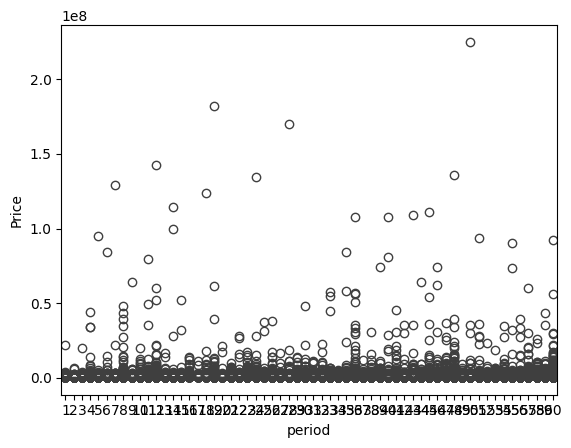

In [ ]:
month_outilers = month_df
sns.boxplot(x='period', y='price', data=month_outilers)
plt.xlabel('period')
plt.ylabel('Price')
plt.show()


After reviewing, we have established two ranges to retain, with the rest considered outliers:


*   Top: from 500k to 4M
*   Bottom: from 150k to 499k

### Top

In [ ]:
top_outliers = month_outilers
top_outliers = top_outliers[(top_outliers['price'] >= 500000) & (top_outliers['price'] <= 4000000)] ## setting the range
top_mean = top_outliers.groupby(['period', 'county_id', 'type_id']).agg({
    'price': 'mean',
    'total_crimes': 'first',
    'new_houses': 'first',
    'migration_thousands': 'first',
    'unemployment_rate': 'first'
}).reset_index()
pd.options.display.float_format = '{:,.2f}'.format
top_mean

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,4,1,"656,824.67",9451,142.00,0.66,0.59
1,1,4,2,"907,246.67",9451,142.00,0.66,0.59
2,1,6,1,"682,148.98",47638,487.00,0.61,0.62
3,1,6,2,"835,940.31",47638,487.00,0.61,0.62
4,1,7,1,"616,741.00",3452,58.00,0.58,0.66
...,...,...,...,...,...,...,...,...
1786,60,24,1,"3,313,039.64",0,93.00,1.07,0.78
1787,60,24,2,"533,000.00",0,93.00,1.07,0.78
1788,60,25,2,"618,866.50",0,100.00,1.65,0.80
1789,60,26,1,"611,574.29",0,134.00,1.43,0.68


Checking the proportion of the top DataFrame

In [ ]:
top_cnt = top_outliers['period'].count()
total_r = month_outilers['period'].count()
top_wgh = (top_cnt / total_r) *100
top_wgh

12.023434469900588

### Bottom

In [ ]:
bottom_outliers = month_outilers
bottom_outliers = bottom_outliers[(bottom_outliers['price'] >= 150000) & (bottom_outliers['price'] <= 499999)] ## setting range
bottom_mean = bottom_outliers.groupby(['period', 'county_id', 'type_id']).agg({
    'price': 'mean',
    'total_crimes': 'first',
    'new_houses': 'first',
    'migration_thousands': 'first',
    'unemployment_rate': 'first'
}).reset_index()
pd.options.display.float_format = '{:,.2f}'.format
bottom_mean

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,1,1,"198,266.84",1227,14.00,0.72,0.96
1,1,1,2,"195,200.00",1227,14.00,0.72,0.96
2,1,2,1,"227,132.16",1230,10.00,0.51,0.85
3,1,2,2,"198,333.33",1230,10.00,0.51,0.85
4,1,3,1,"359,177.37",1614,18.00,0.74,0.70
...,...,...,...,...,...,...,...,...
3019,60,24,2,"250,800.73",0,93.00,1.07,0.78
3020,60,25,1,"268,494.89",0,100.00,1.65,0.80
3021,60,25,2,"265,084.08",0,100.00,1.65,0.80
3022,60,26,1,"370,215.82",0,134.00,1.43,0.68


In [ ]:
bottom_cnt = bottom_outliers['period'].count()
total_r = month_outilers['period'].count()
bot_wgh = (bottom_cnt / total_r) *100
bot_wgh

69.19020433714608

### Appending the full Top and Bottom datasets

In [ ]:
month_nw = pd.concat([bottom_outliers,  top_outliers], ignore_index=True)
month_nw_cnt = month_nw['period'].count()
month_wgh = (month_nw_cnt / total_r) *100
print("Proportion:",month_wgh)
print("rows:",month_nw_cnt)

Proportion: 81.21363880704668
rows: 238708


## Option 2A: DataFrame with the mean of the new dataset, excluding outliers

In [ ]:
nw_df_o = month_nw
mean_new_o = nw_df_o.groupby(['period', 'county_id', 'type_id']).agg({
    'price': 'mean',
    'total_crimes': 'first',
    'new_houses': 'first',
    'migration_thousands': 'first',
    'unemployment_rate': 'first'
}).reset_index()

mean_new_o

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,1,1,"198,266.84",1227,14.00,0.72,0.96
1,1,1,2,"195,200.00",1227,14.00,0.72,0.96
2,1,2,1,"227,132.16",1230,10.00,0.51,0.85
3,1,2,2,"198,333.33",1230,10.00,0.51,0.85
4,1,3,1,"359,177.37",1614,18.00,0.74,0.70
...,...,...,...,...,...,...,...,...
3036,60,24,2,"254,328.22",0,93.00,1.07,0.78
3037,60,25,1,"268,494.89",0,100.00,1.65,0.80
3038,60,25,2,"285,015.48",0,100.00,1.65,0.80
3039,60,26,1,"440,742.65",0,134.00,1.43,0.68


## Creataing 2024 DF

In [ ]:
future_df = per_df[per_df['year'] == 2024] ## filtering 2024
future_df

,year,month,period,county,county_id,type_of_property,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
293926,2024,1,61,Dublin,6,Second-Hand Dwelling house /Apartment,2,"250,000.00",46900,622.00,1.06,0.65
293927,2024,1,61,Dublin,6,Second-Hand Dwelling house /Apartment,2,"1,300,000.00",46900,622.00,1.06,0.65
293928,2024,1,61,Dublin,6,Second-Hand Dwelling house /Apartment,2,"420,000.00",46900,622.00,1.06,0.65
293929,2024,1,61,Dublin,6,Second-Hand Dwelling house /Apartment,2,"410,000.00",46900,622.00,1.06,0.65
293930,2024,1,61,Dublin,6,Second-Hand Dwelling house /Apartment,2,"400,000.00",46900,622.00,1.06,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...
333748,2024,9,69,Laois,11,Second-Hand Dwelling house /Apartment,2,"550,000.00",0,0.00,1.09,0.73
333749,2024,9,69,Donegal,5,Second-Hand Dwelling house /Apartment,2,"40,000.00",0,0.00,0.71,0.88
333750,2024,9,69,Limerick,13,Second-Hand Dwelling house /Apartment,2,"205,000.00",0,0.00,1.12,0.71
333751,2024,9,69,Tipperary,22,Second-Hand Dwelling house /Apartment,2,"400,000.00",0,0.00,0.68,0.63


## INDEX

Filling NA values, renaming columns, keeping the first occurrence, extracting the date, and sorting the data

In [ ]:


# Step 1: Calculate the mean for each column from August 2019 onward
mean_values = f_exc.loc[(f_exc['year'] == 2019) & (f_exc['month'] >= 8)].mean()

# Step 2: Create new DataFrame for January to July 2019 using these mean values
# Define the months and year
months = list(range(1, 8))  # January to July
new_rows = pd.DataFrame({
    'date': pd.to_datetime({'year': [2019]*7, 'month': months, 'day': [1]*7}),
    'tsx adj close': mean_values['tsx adj close'],
    'ftse adj close': mean_values['ftse adj close'],
    'nikkei adj close': mean_values['nikkei adj close'],
    'vwo adj close': mean_values['vwo adj close'],
    'kosdaq adj close': mean_values['kosdaq adj close'],
    'bcom adj close': mean_values['bcom adj close'],
    'glab.l adj close': mean_values['glab.l adj close'],
    'vix adj close': mean_values['vix adj close'],
    'month': months,
    'year': [2019]*7
})

# Step 3: Append new rows to the original DataFrame
f_exc = pd.concat([new_rows, f_exc], ignore_index=True)

#  Sort by date
f_exc = f_exc.sort_values(by=['year', 'month']).reset_index(drop=True)
# Keep the first occurrence and drop the rest
f_exc = f_exc.drop_duplicates(subset=['year', 'month'], keep='first').reset_index(drop=True)

f_exc.head()


,date,tsx adj close,ftse adj close,nikkei adj close,vwo adj close,kosdaq adj close,bcom adj close,glab.l adj close,vix adj close,month,year
0,2019-01-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,1,2019
1,2019-02-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,2,2019
2,2019-03-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,3,2019
3,2019-04-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,4,2019
4,2019-05-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,5,2019


Adding the period column


In [ ]:
f_exc['period'] = ((f_exc['year'] - 2019) * 12 + f_exc['month'])
f_exc['period'].unique()
f_exc.columns = f_exc.columns.str.replace(' adj close', '', regex=False)
fdf= f_exc
fdf.head(5)

,date,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix,month,year,period
0,2019-01-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,1,2019,1
1,2019-02-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,2,2019,2
2,2019-03-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,3,2019,3
3,2019-04-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,4,2019,4
4,2019-05-01,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30,5,2019,5


Reordering columns

In [ ]:
fdf = fdf[['year', 'month', 'period', 'tsx', 'ftse', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']]
fdf.head()

,year,month,period,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix
0,2019,1,1,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30
1,2019,2,2,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30
2,2019,3,3,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30
3,2019,4,4,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30
4,2019,5,5,"16,651.13","7,301.19","22,270.93",35.97,633.93,78.52,31.68,15.30


# Data Mining

#### Correlation Matrix

Creating a correlation matrix using the monthly DataFrame to evaluate each feature

                     price  total_crimes  new_houses  migration_thousands  \
price                 1.00          0.05        0.10                 0.00   
total_crimes          0.05          1.00        0.41                -0.07   
new_houses            0.10          0.41        1.00                 0.01   
migration_thousands   0.00         -0.07        0.01                 1.00   
unemployment_rate    -0.06         -0.19       -0.44                -0.23   

                     unemployment_rate  
price                            -0.06  
total_crimes                     -0.19  
new_houses                       -0.44  
migration_thousands              -0.23  
unemployment_rate                 1.00  


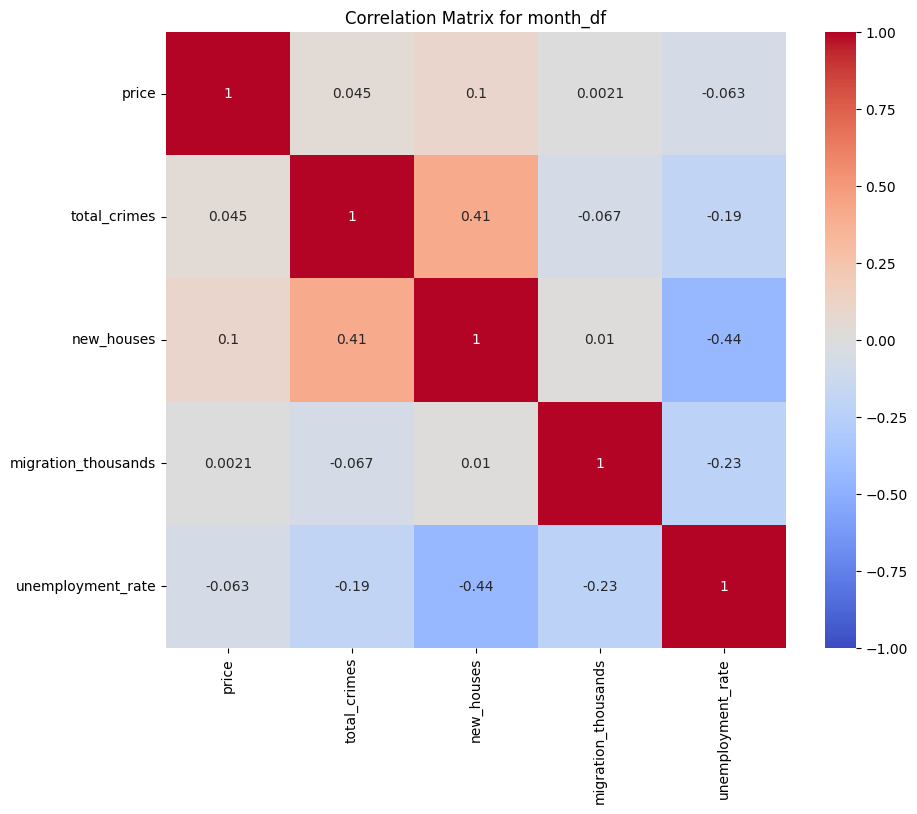

In [ ]:
#### Ploting month
# Filter the columns of interest
numeric_df = month_df[['price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for month_df")
plt.show()

                     price  total_crimes  new_houses  migration_thousands  \
price                 1.00          0.22        0.46                 0.08   
total_crimes          0.22          1.00        0.48                -0.03   
new_houses            0.46          0.48        1.00                 0.03   
migration_thousands   0.08         -0.03        0.03                 1.00   
unemployment_rate    -0.28         -0.15       -0.36                -0.20   

                     unemployment_rate  
price                            -0.28  
total_crimes                     -0.15  
new_houses                       -0.36  
migration_thousands              -0.20  
unemployment_rate                 1.00  


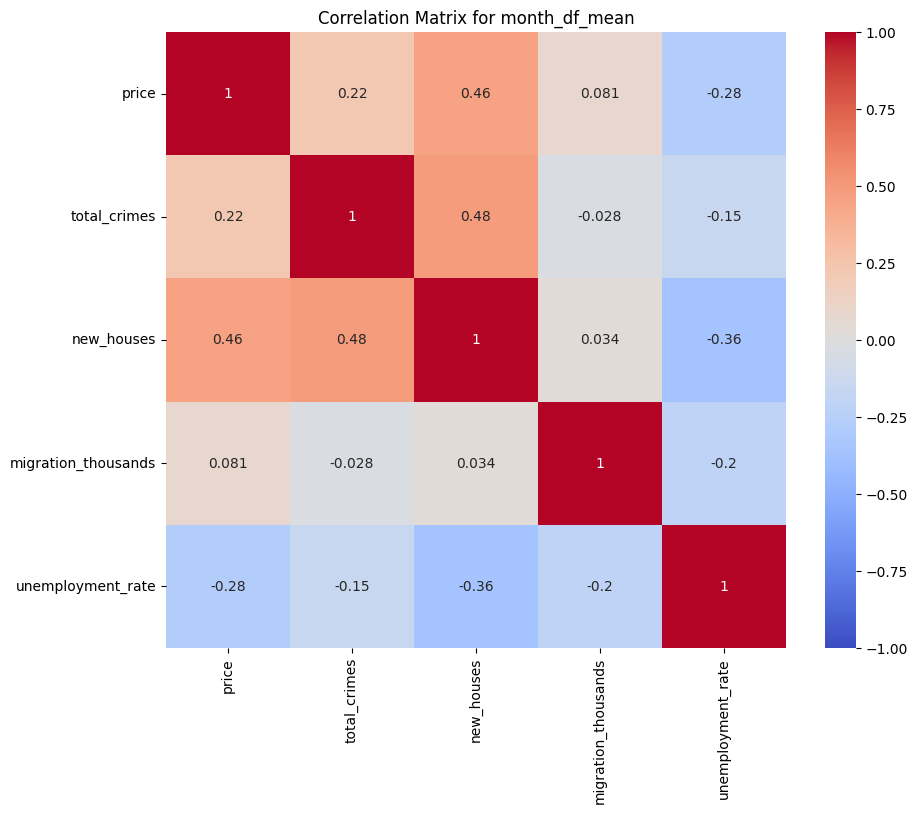

In [ ]:
#### Ploting month
# Filter the columns of interest
numeric_df = month_df_mean[['price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Optional: Visualize with a heatmap for better insight
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for month_df_mean")
plt.show()

                     price  total_crimes  new_houses  migration_thousands  \
price                 1.00          0.34        0.35                 0.28   
total_crimes          0.34          1.00        0.96                 0.83   
new_houses            0.35          0.96        1.00                 0.89   
migration_thousands   0.28          0.83        0.89                 1.00   
unemployment_rate    -0.36         -0.19       -0.21                -0.34   

                     unemployment_rate  
price                            -0.36  
total_crimes                     -0.19  
new_houses                       -0.21  
migration_thousands              -0.34  
unemployment_rate                 1.00  


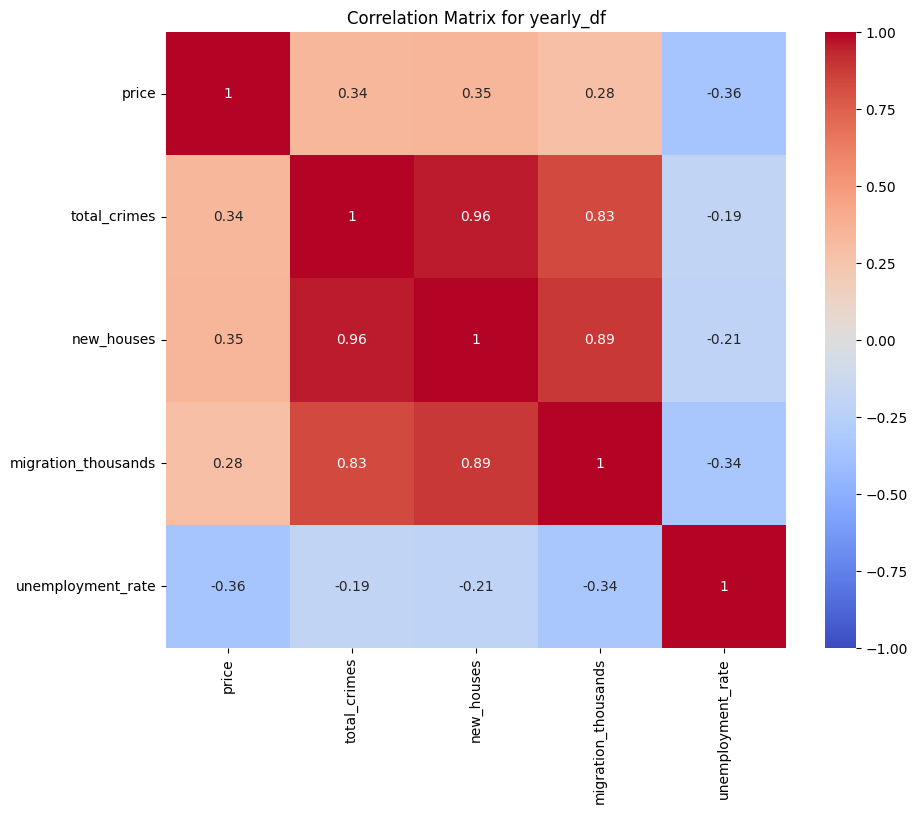

In [ ]:
#### Ploting year
# Filter the columns of interest
numeric_df = yearly_df[['price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']]

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Optional: Visualize with a heatmap for better insight
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for yearly_df")
plt.show()

In [ ]:
yearly_df

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,1,1,"193,109.53",67115,"2,101.00",86.40,0.96
1,1,1,2,"170,936.50",208547,"9,090.00",401.04,0.96
2,1,2,1,"172,210.18",26790,706.00,31.62,0.85
3,1,2,2,"142,817.62",369479,"8,935.00",392.70,0.85
4,1,3,1,"317,052.25",26391,"3,106.00",69.56,0.70
...,...,...,...,...,...,...,...,...
255,5,24,2,"243,569.56",695691,"47,183.00","1,148.11",0.78
256,5,25,1,"334,077.30",255634,"32,283.00",648.45,0.80
257,5,25,2,"257,781.74",1492676,"149,852.00","3,064.05",0.80
258,5,26,1,"623,631.54",452482,"108,457.00","1,234.09",0.68


### Clustering



Creating a DataFrame for the K-means clustering model

In [ ]:
#mth_mean_df = mean_new_o OPTION 2A
mth_mean_df = month_nw #OPTION 2
#month_df # OPTION 1
#month_df_mean OPTION 1A


In [ ]:
mth_mean_df

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate
0,1,24,2,"165,000.00",1842,17.00,0.62,0.89
1,1,4,2,"195,000.00",9451,142.00,0.66,0.59
2,1,8,1,"321,585.17",2522,27.00,0.62,0.70
3,1,6,1,"290,750.00",47638,487.00,0.61,0.62
4,1,6,2,"460,000.00",47638,487.00,0.61,0.62
...,...,...,...,...,...,...,...,...
238703,60,15,2,"800,000.00",0,149.00,1.12,0.88
238704,60,4,2,"700,000.00",0,280.00,1.12,0.55
238705,60,9,2,"750,000.00",0,258.00,1.48,0.59
238706,60,22,2,"590,000.00",0,45.00,0.67,0.62


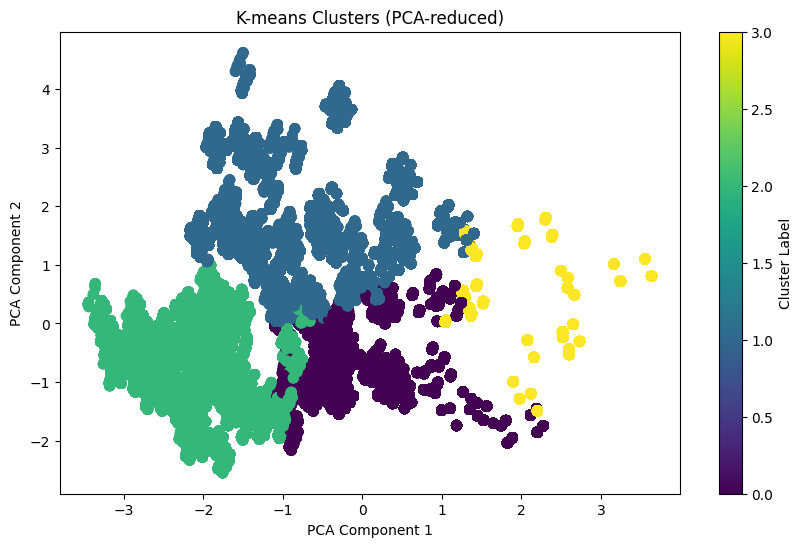

In [ ]:
# 'mth_mean_df' features
features = ['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate']
X = mth_mean_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
mth_mean_df['cluster_label'] = kmeans.fit_predict(X_scaled)

# PCA for dimensionality reduction (2 components for 2D plot)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = mth_mean_df['cluster_label']

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster_label'], cmap='viridis', s=50)
plt.title('K-means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()




In [ ]:
# Count: how many unique counties are in each cluster
counties_per_cluster = mth_mean_df.groupby('cluster_label')['county_id'].nunique()
print(counties_per_cluster)


cluster_label
0    10
1    25
2    20
3     1
Name: county_id, dtype: int64


##Cluster Label DF

Creating a DataFrame by adding the cluster label to the main DataFrame

In [ ]:
clusterdf = mth_mean_df
cluster_0 = clusterdf[clusterdf['cluster_label'] == 0]
cluster_1 = clusterdf[clusterdf['cluster_label'] == 1]
cluster_2 = clusterdf[clusterdf['cluster_label'] == 2]
cluster_3 = clusterdf[clusterdf['cluster_label'] == 3]

### Testing filter
print (cluster_0['cluster_label'].unique())
print (cluster_1['cluster_label'].unique())
print (cluster_2['cluster_label'].unique())
print (cluster_3['cluster_label'].unique())

[0]
[1]
[2]
[3]


Adding financial indexes to the dataset

In [ ]:
#Merging all clusters with index
clf_0 = cluster_0.merge(fdf, on='period', how='left')
clf_1 = cluster_1.merge(fdf, on='period', how='left')
clf_2 = cluster_2.merge(fdf, on='period', how='left')
clf_3 = cluster_3.merge(fdf, on='period', how='left')
# Removing month and year column
clf_0 = clf_0[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']]
clf_1 = clf_1[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']]
clf_2 = clf_2[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']]
clf_3 = clf_3[['period', 'county_id', 'type_id', 'price', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']]


print (clf_0['period'].count())
print (clf_1['period'].count())
print (clf_2['period'].count())
print (clf_3['period'].count())


94269
61726
43465
39248


Checking dataframe

In [ ]:
mth_mean_df

,period,county_id,type_id,price,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label
0,1,24,2,"165,000.00",1842,17.00,0.62,0.89,2
1,1,4,2,"195,000.00",9451,142.00,0.66,0.59,0
2,1,8,1,"321,585.17",2522,27.00,0.62,0.70,0
3,1,6,1,"290,750.00",47638,487.00,0.61,0.62,0
4,1,6,2,"460,000.00",47638,487.00,0.61,0.62,0
...,...,...,...,...,...,...,...,...,...
238703,60,15,2,"800,000.00",0,149.00,1.12,0.88,1
238704,60,4,2,"700,000.00",0,280.00,1.12,0.55,1
238705,60,9,2,"750,000.00",0,258.00,1.48,0.59,1
238706,60,22,2,"590,000.00",0,45.00,0.67,0.62,1


Appending all cluster datasets into one DataFrame

In [ ]:

combined_df = pd.concat([clf_0, clf_1, clf_2, clf_3], ignore_index=True)


In [ ]:
combined_df.dtypes

,0
period,int32
county_id,int64
type_id,int64
price,float64
total_crimes,int64
new_houses,float64
migration_thousands,float64
unemployment_rate,float64
cluster_label,int32
tsx,float64


##Creating CSV Files

To scale this model, we are exporting all datasets to generate parameters during the implementation phase.

In [ ]:

## Main data sets before clustering
month_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/month_option.csv", index=False)
month_df_mean.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/month_mean_option.csv", index=False)
county_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/county_map.csv", index=False)
description_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/type_map.csv", index=False)

## Data sets with cluster_label column
mth_mean_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/labeled_data.csv", index=False)
mth_mean_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/labeled_data_mean.csv", index=False)

## Option 1 cluster files
clf_0.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0.csv", index=False)
clf_1.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1.csv", index=False)
clf_2.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2.csv", index=False)
clf_3.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3.csv", index=False)

# Option 1A cluster files
clf_0.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_mean.csv", index=False)
clf_1.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_mean.csv", index=False)
clf_2.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_mean.csv", index=False)
clf_3.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_mean.csv", index=False)

#Option 2 cluster files
clf_0.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_ot_f.csv", index=False)
clf_1.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_ot_f.csv", index=False)
clf_2.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_ot_f.csv", index=False)
clf_3.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_ot_f.csv", index=False)

#Option 2A cluster files
clf_0.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_ot.csv", index=False)
clf_1.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_ot.csv", index=False)
clf_2.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_ot.csv", index=False)
clf_3.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_ot.csv", index=False)

## Apending clusters in to a single dataframe for each option
combined_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_merge.csv", index=False)
combined_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_merge_mean.csv", index=False)
combined_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_merge_ot_f.csv", index=False)
combined_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_merge_ot.csv", index=False)

## 2024 data set
future_df.to_csv("/content/drive/MyDrive/ML_Project_DBs/clean_dfs/2024_data.csv", index=False)


## Implementation Option 1

### Load Each Cluster's Dataframe

In [ ]:
clf_0 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0.csv"
clf_1 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1.csv"
clf_2 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2.csv"
clf_3 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3.csv"

clf_0 = pd.read_csv(clf_0)
clf_1 = pd.read_csv(clf_1)
clf_2 = pd.read_csv(clf_2)
clf_3 = pd.read_csv(clf_3)

#Arrange dataframes so that the last column is the target variable
columns_0 = list(clf_0.columns)
columns_0.append(columns_0.pop(3))
clf_0 = clf_0[columns_0]

columns_1 = list(clf_1.columns)
columns_1.append(columns_1.pop(3))
clf_1 = clf_1[columns_1]

columns_2 = list(clf_2.columns)
columns_2.append(columns_2.pop(3))
clf_2 = clf_2[columns_2]

columns_3 = list(clf_3.columns)
columns_3.append(columns_3.pop(3))
clf_3 = clf_3[columns_3]


#split data into train and test splits
train_indices_0, test_indices_0 = train_test_split(clf_0.index, test_size=0.2, random_state=42)
X_0_train = clf_0.iloc[train_indices_0, :-1]
y_0_train = clf_0.iloc[train_indices_0, -1]
X_0_test = clf_0.iloc[test_indices_0, :-1]
y_0_test = clf_0.iloc[test_indices_0, -1]


train_indices_1, test_indices_1 = train_test_split(clf_1.index, test_size=0.2, random_state=42)
X_1_train = clf_1.iloc[train_indices_1, :-1]
y_1_train = clf_1.iloc[train_indices_1, -1]
X_1_test = clf_1.iloc[test_indices_1, :-1]
y_1_test = clf_1.iloc[test_indices_1, -1]


train_indices_2, test_indices_2 = train_test_split(clf_2.index, test_size=0.2, random_state=42)
X_2_train = clf_2.iloc[train_indices_2, :-1]
y_2_train = clf_2.iloc[train_indices_2, -1]
X_2_test = clf_2.iloc[test_indices_2, :-1]
y_2_test = clf_2.iloc[test_indices_2, -1]


train_indices_3, test_indices_3 = train_test_split(clf_3.index, test_size=0.2, random_state=42)
X_3_train = clf_3.iloc[train_indices_3, :-1]
y_3_train = clf_3.iloc[train_indices_3, -1]
X_3_test = clf_3.iloc[test_indices_3, :-1]
y_3_test = clf_3.iloc[test_indices_3, -1]




In [ ]:
#Concatenate all clusters into 1 dataframe
all_clusters = pd.concat([clf_0, clf_1, clf_2, clf_3], axis=0, ignore_index=True)

train_indices_4, test_indices_4 = train_test_split(all_clusters.index, test_size=0.2, random_state=42)
allc_train = all_clusters.iloc[train_indices_4, :-1]
allcy_train = all_clusters.iloc[train_indices_4, -1]
allc_test = all_clusters.iloc[test_indices_4, :-1]
allcy_test = all_clusters.iloc[test_indices_4, -1]

In [ ]:
#Slice the allclusters dataset for the best features as indicated by the backward stepwise regression
allclusters_bestfeatures = all_clusters[['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'bcom', 'price']]
allclusters_bestfeatures
train_indices_5, test_indices_5= train_test_split(allclusters_bestfeatures.index, test_size=0.2, random_state=42)
all_train = allclusters_bestfeatures.iloc[train_indices_5, :-1]
ally_train = allclusters_bestfeatures.iloc[train_indices_5, -1]
all_test = allclusters_bestfeatures.iloc[test_indices_5, :-1]
ally_test = allclusters_bestfeatures.iloc[test_indices_5, -1]

allclusters_bestfeatures.head(50)

,period,county_id,type_id,total_crimes,new_houses,unemployment_rate,cluster_label,tsx,ftse,bcom,price
0,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,30000.00
1,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,30000.00
2,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,15000.00
3,1,6,1,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,290750.00
4,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,460000.00
5,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,221500.00
6,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,265000.00
7,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,535000.00
8,1,6,1,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,414097.00
9,1,6,2,47638.0,487.0,0.62,0,16651.132114,7301.189901,78.523945,2500000.00


In [ ]:
#Summary Statistics for all data
clf0summary = clf_0.describe().round(2)
clf1summary = clf_1.describe().round(2)
clf2summary = clf_2.describe().round(2)
clf3summary = clf_3.describe().round(2)
allclfsummary = all_clusters.describe().round(2)
bestftsummary = allclusters_bestfeatures.describe().round(2)

In [ ]:
clf3summary

,period,county_id,type_id,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix,price
count,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.0,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00
mean,33.47,6.01,1.81,0.84,810.88,0.71,0.65,3.0,18936.42,7290.66,26846.93,39.40,791.20,97.02,29.91,20.27,543498.85
std,18.74,0.32,0.39,75.41,245.05,0.23,0.02,0.0,1826.86,427.59,3669.97,3.81,123.65,17.85,2.01,6.61,1218996.95
min,2.00,4.00,1.00,0.00,56.00,0.30,0.55,3.0,14620.30,5655.00,19619.35,30.74,619.81,60.71,26.76,12.30,5400.00
25%,14.00,6.00,2.00,0.00,647.00,0.61,0.64,3.0,16651.13,7186.20,22971.94,36.46,646.85,78.52,27.81,15.30,290000.00
50%,38.00,6.00,2.00,0.00,826.00,0.70,0.64,3.0,19672.30,7302.40,27457.89,38.44,802.95,101.47,30.85,17.90,380000.00
75%,50.00,6.00,2.00,0.00,902.00,1.04,0.66,3.0,20532.90,7533.00,28814.34,40.92,891.29,108.57,31.68,25.56,535000.00
max,60.00,26.00,2.00,10687.00,1390.00,1.97,1.03,3.0,21953.00,7914.90,33476.58,49.40,1045.98,132.80,32.35,37.19,39670698.00


In [ ]:
coutties = clf_0[]

### Gradient Boosting Regression


Gradient Boosting Function

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
import numpy as np

def gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
gradient_boosting_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 947052166757.9049
Root Mean Squared Error (RMSE): 973166.0530237915
Mean Absolute Error (MAE): 269518.64350226516
R² Score: 0.004509031766858795
Explained Variance Score: 0.004587305988647761
Max Error: 38621076.98616357


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 947052166757.9049,
  'Root Mean Squared Error (RMSE)': 973166.0530237915,
  'Mean Absolute Error (MAE)': 269518.64350226516,
  'R² Score': 0.004509031766858795,
  'Explained Variance Score': 0.004587305988647761,
  'Max Error': 38621076.98616357})

2. Cluster 1

In [ ]:
gradient_boosting_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 69951158702.81532
Root Mean Squared Error (RMSE): 264482.8136246575
Mean Absolute Error (MAE): 107050.91344709363
R² Score: 0.08945526854264996
Explained Variance Score: 0.08947632226740099
Max Error: 13849466.223016586


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 69951158702.81532,
  'Root Mean Squared Error (RMSE)': 264482.8136246575,
  'Mean Absolute Error (MAE)': 107050.91344709363,
  'R² Score': 0.08945526854264996,
  'Explained Variance Score': 0.08947632226740099,
  'Max Error': 13849466.223016586})

3. Cluster 2

In [ ]:
gradient_boosting_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 3378619920659677.0
Root Mean Squared Error (RMSE): 58125897.16004112
Mean Absolute Error (MAE): 43387096.06296899
R² Score: -1.6976635199477226
Explained Variance Score: -1.4779163515761948
Max Error: 121740513.55470581


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 3378619920659677.0,
  'Root Mean Squared Error (RMSE)': 58125897.16004112,
  'Mean Absolute Error (MAE)': 43387096.06296899,
  'R² Score': -1.6976635199477226,
  'Explained Variance Score': -1.4779163515761948,
  'Max Error': 121740513.55470581})

4. Cluster 3

In [ ]:
gradient_boosting_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 769336555089.4868
Root Mean Squared Error (RMSE): 877118.3244520016
Mean Absolute Error (MAE): 286639.3836597384
R² Score: 0.41392910660623483
Explained Variance Score: 0.4140431502028403
Max Error: 30477942.374589052


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 769336555089.4868,
  'Root Mean Squared Error (RMSE)': 877118.3244520016,
  'Mean Absolute Error (MAE)': 286639.3836597384,
  'R² Score': 0.41392910660623483,
  'Explained Variance Score': 0.4140431502028403,
  'Max Error': 30477942.374589052})

5. All clusters

In [ ]:
gradient_boosting_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 668348270757.138
Root Mean Squared Error (RMSE): 817525.7003649108
Mean Absolute Error (MAE): 157554.47774540016
R² Score: 0.6222558456041154
Explained Variance Score: 0.6222594184761058
Max Error: 100284151.70835507


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 668348270757.138,
  'Root Mean Squared Error (RMSE)': 817525.7003649108,
  'Mean Absolute Error (MAE)': 157554.47774540016,
  'R² Score': 0.6222558456041154,
  'Explained Variance Score': 0.6222594184761058,
  'Max Error': 100284151.70835507})

6. Best features

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 695472965906.3369
Root Mean Squared Error (RMSE): 833950.2178825405
Mean Absolute Error (MAE): 157931.9019154305
R² Score: 0.6069252231117839
Explained Variance Score: 0.6069300288075585
Max Error: 93003448.97755232


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 695472965906.3369,
  'Root Mean Squared Error (RMSE)': 833950.2178825405,
  'Mean Absolute Error (MAE)': 157931.9019154305,
  'R² Score': 0.6069252231117839,
  'Explained Variance Score': 0.6069300288075585,
  'Max Error': 93003448.97755232})

Cross Validation to optimise parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

model, metrics = gradient_boosting_regression(
    all_train,
    ally_train,
    all_test,
    ally_test,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(all_train, ally_train)
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error (MSE): 608390481563.0958
Root Mean Squared Error (RMSE): 779993.8984140169
Mean Absolute Error (MAE): 156560.76374182897
R² Score: 0.656143423936431
Explained Variance Score: 0.6561445559529002
Max Error: 84453961.506457


KeyboardInterrupt: 

Apply Optimised parameters to the best features dataset

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)

### XGBOOST

In [ ]:
def xgboost_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, random_state=42):

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

1. Cluster 0

In [ ]:
xgboost_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 947525759707.3727
Root Mean Squared Error (RMSE): 973409.3484795452
Mean Absolute Error (MAE): 269931.0424507729
R² Score: 0.004011215996658879
Explained Variance Score: 0.004088982665912622
Max Error: 38623046.995


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 947525759707.3727,
  'Root Mean Squared Error (RMSE)': 973409.3484795452,
  'Mean Absolute Error (MAE)': 269931.0424507729,
  'R² Score': 0.004011215996658879,
  'Explained Variance Score': 0.004088982665912622,
  '

2. Cluster 1

In [ ]:
xgboost_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 69763131585.37444
Root Mean Squared Error (RMSE): 264127.11255260115
Mean Absolute Error (MAE): 107461.61535065234
R² Score: 0.09190279199089313
Explained Variance Score: 0.09192670357730881
Max Error: 13850088.98125


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 69763131585.37444,
  'Root Mean Squared Error (RMSE)': 264127.11255260115,
  'Mean Absolute Error (MAE)': 107461.61535065234,
  'R² Score': 0.09190279199089313,
  'Explained Variance Score': 0.09192670357730881,
  '

3. Cluster 2

In [ ]:
xgboost_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 3286120381842506.0
Root Mean Squared Error (RMSE): 57324692.60137821
Mean Absolute Error (MAE): 41240623.116000004
R² Score: -1.6238071415036068
Explained Variance Score: -1.4530908871970194
Max Error: 120725242.2


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 3286120381842506.0,
  'Root Mean Squared Error (RMSE)': 57324692.60137821,
  'Mean Absolute Error (MAE)': 41240623.116000004,
  'R² Score': -1.6238071415036068,
  'Explained Variance Score': -1.4530908871970194,
  '

4. Cluster 3

In [ ]:
xgboost_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 748380148263.689
Root Mean Squared Error (RMSE): 865089.6764288017
Mean Absolute Error (MAE): 286354.28149191965
R² Score: 0.4298934332581641
Explained Variance Score: 0.4299934410897276
Max Error: 30504644.40625


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 748380148263.689,
  'Root Mean Squared Error (RMSE)': 865089.6764288017,
  'Mean Absolute Error (MAE)': 286354.28149191965,
  'R² Score': 0.4298934332581641,
  'Explained Variance Score': 0.4299934410897276,
  'Max 

5. All clusters

In [ ]:
xgboost_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 672168448604.3252
Root Mean Squared Error (RMSE): 819858.7979672629
Mean Absolute Error (MAE): 157308.1342533724
R² Score: 0.6200967170274934
Explained Variance Score: 0.6200969111130443
Max Error: 114177028.0


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 672168448604.3252,
  'Root Mean Squared Error (RMSE)': 819858.7979672629,
  'Mean Absolute Error (MAE)': 157308.1342533724,
  'R² Score': 0.6200967170274934,
  'Explained Variance Score': 0.6200969111130443,
  'Max 

6. Best Features

In [ ]:
xgboost_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 760868359233.9175
Root Mean Squared Error (RMSE): 872277.684704772
Mean Absolute Error (MAE): 158032.14570151697
R² Score: 0.5699643620835526
Explained Variance Score: 0.5699648648446771
Max Error: 115218528.0


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 760868359233.9175,
  'Root Mean Squared Error (RMSE)': 872277.684704772,
  'Mean Absolute Error (MAE)': 158032.14570151697,
  'R² Score': 0.5699643620835526,
  'Explained Variance Score': 0.5699648648446771,
  'Max 

CV for model tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10, 50]
}

def randomized_search_xgboost(X_train, y_train, X_test, y_test, random_state=42, n_iter=50):

    # Initialize the XGBoost Regressor
    xgb = XGBRegressor(random_state=random_state)

    # Randomized Search
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        random_state=random_state,
        n_jobs=-1
    )

    # Fit the randomized search
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print results
    print("\nBest Parameters from Randomized Search:", random_search.best_params_)
    print("\nPerformance Metrics for the Best Model:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return best_model, metrics


Application CV on Best Features & Optimised Params

In [ ]:
randomized_search_xgboost(all_train, ally_train, all_test, ally_test, random_state=42, n_iter=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters from Randomized Search: {'subsample': 1.0, 'reg_lambda': 50, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}

Performance Metrics for the Best Model:
Mean Squared Error (MSE): 601258207631.1355
Root Mean Squared Error (RMSE): 775408.4134384508
Mean Absolute Error (MAE): 156971.87511228226
R² Score: 0.6601745180579076
Explained Variance Score: 0.660176936703562
Max Error: 105258928.0


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 601258207631.1355,
  'Root Mean Squared Error (RMSE)': 775408.4134384508,
  'Mean Absolute Error (MAE)': 156971.87511228226,
  'R² Score': 0.6601745180579076,
  'Explained Variance Score': 0.660176936703562,
  'Max Error': 

In [ ]:
#Optimised XGboost
def opt_xgboost(X_train, y_train, X_test, y_test):
    params = {
        'subsample': 1.0,
        'reg_lambda': 50,
        'reg_alpha': 0.1,
        'n_estimators': 200,
        'min_child_weight': 1,
        'max_depth': 3,
        'learning_rate': 0.2,
        'gamma': 0.1,
        'colsample_bytree': 1.0
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
model, metrics = opt_xgboost(all_train, ally_train, all_test, ally_test)

Mean Squared Error (MSE): 548558630335.5077
Root Mean Squared Error (RMSE): 740647.4399709404
Mean Absolute Error (MAE): 156565.19248312738
R² Score: 0.6899598233150094
Explained Variance Score: 0.6899632498229595
Max Error: 83977716.0


### STACKING REGRESSOR

In [ ]:
def stacking_regressor(X_train, y_train, X_test, y_test):
    # Define base learners
    base_learners = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('svr', SVR(kernel='linear'))
    ]

    # Define the meta-model
    meta_model = LinearRegression()

    # Initialize the Stacking Regressor
    model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

1. Cluster 0

In [ ]:
stacking_regressor(X_0_train, y_0_train, X_0_test, y_0_test)

KeyboardInterrupt: 

2. Cluster 1

In [ ]:
stacking_regressor(X_1_train, y_1_train, X_1_test, y_1_test)

3. Cluster 2

In [ ]:
stacking_regressor(X_2_train, y_2_train, X_2_test, y_2_test)

4. Cluster 3

In [ ]:
stacking_regressor(X_3_train, y_3_train, X_3_test, y_3_test)

5. All clusters

In [ ]:
stacking_regressor(allc_train, allcy_train, allc_test, allcy_test)

6. Best features

In [ ]:
stacking_regressor(all_train, ally_train, all_test, ally_test)

### Random Forest

In [ ]:
def RFR(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
RFR(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 947615919703.538
Root Mean Squared Error (RMSE): 973455.6588276314
Mean Absolute Error (MAE): 269567.80360947765
R² Score: 0.003916444594376234
Explained Variance Score: 0.004006412792942116
Max Error: 38631628.02676732


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 947615919703.538,
  'Root Mean Squared Error (RMSE)': 973455.6588276314,
  'Mean Absolute Error (MAE)': 269567.80360947765,
  'R² Score': 0.003916444594376234,
  'Explained Variance Score': 0.004006412792942116,
  'Max Error': 38631628.02676732})

2. Cluster 1

In [ ]:
RFR(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 70942065771.24263
Root Mean Squared Error (RMSE): 266349.51806084166
Mean Absolute Error (MAE): 109115.24752594785
R² Score: 0.07655676582658244
Explained Variance Score: 0.07658280109649973
Max Error: 13846844.797481429


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 70942065771.24263,
  'Root Mean Squared Error (RMSE)': 266349.51806084166,
  'Mean Absolute Error (MAE)': 109115.24752594785,
  'R² Score': 0.07655676582658244,
  'Explained Variance Score': 0.07658280109649973,
  'Max Error': 13846844.797481429})

3. Cluster 2

In [ ]:
RFR(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 2560944208688341.0
Root Mean Squared Error (RMSE): 50605772.48386137
Mean Absolute Error (MAE): 41425570.81260657
R² Score: -1.0447892721389702
Explained Variance Score: -0.9016520316628056
Max Error: 110047156.35958919


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 2560944208688341.0,
  'Root Mean Squared Error (RMSE)': 50605772.48386137,
  'Mean Absolute Error (MAE)': 41425570.81260657,
  'R² Score': -1.0447892721389702,
  'Explained Variance Score': -0.9016520316628056,
  'Max Error': 110047156.35958919})

4. Cluster 3

In [ ]:
RFR(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 751737469660.9993
Root Mean Squared Error (RMSE): 867027.9520644068
Mean Absolute Error (MAE): 287632.6798996717
R² Score: 0.4273358681227043
Explained Variance Score: 0.4274630287577389
Max Error: 30508113.982276846


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 751737469660.9993,
  'Root Mean Squared Error (RMSE)': 867027.9520644068,
  'Mean Absolute Error (MAE)': 287632.6798996717,
  'R² Score': 0.4273358681227043,
  'Explained Variance Score': 0.4274630287577389,
  'Max Error': 30508113.982276846})

5. All cluster

In [ ]:
RFR(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 820012540980.0891
Root Mean Squared Error (RMSE): 905545.4383851144
Mean Absolute Error (MAE): 158694.01139222045
R² Score: 0.5365366270258488
Explained Variance Score: 0.5365400230791435
Max Error: 123371825.24554251


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 820012540980.0891,
  'Root Mean Squared Error (RMSE)': 905545.4383851144,
  'Mean Absolute Error (MAE)': 158694.01139222045,
  'R² Score': 0.5365366270258488,
  'Explained Variance Score': 0.5365400230791435,
  'Max Error': 123371825.24554251})

6. Best features

In [ ]:
RFR(all_train, ally_train, all_test, ally_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 806539181161.4568
Root Mean Squared Error (RMSE): 898075.2647531591
Mean Absolute Error (MAE): 159102.61879995212
R² Score: 0.5441516432295941
Explained Variance Score: 0.5441528547077332
Max Error: 123371825.24554251


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 806539181161.4568,
  'Root Mean Squared Error (RMSE)': 898075.2647531591,
  'Mean Absolute Error (MAE)': 159102.61879995212,
  'R² Score': 0.5441516432295941,
  'Explained Variance Score': 0.5441528547077332,
  'Max Error': 123371825.24554251})

### Bagging Regressor

In [ ]:
def bagging_regressor(X_train, y_train, X_test, y_test, base_estimator=None, n_estimators=10, random_state=42):

    # Initialize the Bagging Regressor
    model = BaggingRegressor(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=random_state
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_0_train, y_0_train)

# Make predictions
y_pred = bagging_regressor.predict(X_0_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_0_test, y_pred)
r2 = r2_score(y_0_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 948621115168.2502
R2: 0.0028598364775755947


2. Cluster 1

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_1_train, y_1_train)

# Make predictions
y_pred = bagging_regressor.predict(X_1_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_1_test, y_pred)
r2 = r2_score(y_1_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 71454210728.44746
R2: 0.06989024448264736


3. Cluster 2

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_2_train, y_2_train)

# Make predictions
y_pred = bagging_regressor.predict(X_2_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_2_test, y_pred)
r2 = r2_score(y_2_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 2977018397134900.0
R2: -1.377004255215546


4. Cluster 3

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_3_train, y_3_train)

# Make predictions
y_pred = bagging_regressor.predict(X_3_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_3_test, y_pred)
r2 = r2_score(y_3_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 738447270949.513
R2: 0.437460174033679


5. All clusters

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(allc_train, allcy_train)

# Make predictions
y_pred = bagging_regressor.predict(allc_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(allcy_test, y_pred)
r2 = r2_score(allcy_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 867260921734.7969
R2: 0.5098322867654289


6. Best features

In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(all_train, ally_train)

# Make predictions
y_pred = bagging_regressor.predict(all_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(ally_test, y_pred)
r2 = r2_score(ally_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 821360015339.0867
R2: 0.5357750471960199


### Backwards Stepwise Regression

In [ ]:
X = all_clusters.iloc[:, :-1]
y = all_clusters.iloc[:, -1]


y.head(50)

,price
0,30000.00
1,30000.00
2,15000.00
3,290750.00
4,460000.00
5,221500.00
6,265000.00
7,535000.00
8,414097.00
9,2500000.00


In [ ]:
import statsmodels.api as sm
def backward_stepwise(X, y, significance_level=0.05):

    # Start with all features
    remaining_features = list(X.columns)
    selected_features = remaining_features.copy()
    iteration = 1

    while len(remaining_features) > 0:
        # Fit the model with the remaining features
        X_with_constant = sm.add_constant(X[remaining_features])  # Add constant for intercept
        model = sm.OLS(y, X_with_constant).fit()

        # Get the p-values
        p_values = model.pvalues[1:]  # Exclude the intercept

        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            worst_feature = p_values.idxmax()
            remaining_features.remove(worst_feature)
            print(f"Iteration {iteration}: Removed feature '{worst_feature}' with p-value {max_p_value:.4f}")
            iteration += 1
        else:
            break

    # Final selected features
    selected_features = remaining_features
    print("\nSelected Features:", selected_features)

    # Fit the final model with selected features
    X_selected_with_constant = sm.add_constant(X[selected_features])
    final_model = sm.OLS(y, X_selected_with_constant).fit()

    return selected_features, final_model


In [ ]:
backward_stepwise(X, y, significance_level=0.05)

Iteration 1: Removed feature 'glab.l' with p-value 0.8398
Iteration 2: Removed feature 'kosdaq' with p-value 0.7737
Iteration 3: Removed feature 'vix' with p-value 0.4267
Iteration 4: Removed feature 'migration_thousands' with p-value 0.2212
Iteration 5: Removed feature 'vwo' with p-value 0.1334
Iteration 6: Removed feature 'nikkei' with p-value 0.3806

Selected Features: ['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'unemployment_rate', 'cluster_label', 'tsx', 'ftse', 'bcom']


(['period',
  'county_id',
  'type_id',
  'total_crimes',
  'new_houses',
  'unemployment_rate',
  'cluster_label',
  'tsx',
  'ftse',
  'bcom'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f7ddc7434f0>)

### SVR

In [ ]:
def rbf_svr_fast(X_train, y_train, X_test, y_test):
    # Subsample for faster training (optional)
    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=10000, random_state=42)

    # Define the pipeline with scaling and RBF SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'))  # Use predefined parameters
    ])

    # Train the model on the subset or full dataset
    pipeline.fit(X_train_sub, y_train_sub)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RBF SVR - Mean Squared Error (MSE): {mse}")
    print(f"RBF SVR - R² Score: {r2}")

    return pipeline, mse, r2

1. Cluster 0

In [ ]:
rbf_svr_fast(X_0_train, y_0_train, X_0_test, y_0_test)

RBF SVR - Mean Squared Error (MSE): 968496762902.3175
RBF SVR - R² Score: -0.018032389422484307


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 968496762902.3175,
 -0.018032389422484307)

2. Cluster 1

In [ ]:
rbf_svr_fast(X_1_train, y_1_train, X_1_test, y_1_test)


RBF SVR - Mean Squared Error (MSE): 77763794631.82066
RBF SVR - R² Score: -0.012240752164779822


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 77763794631.82066,
 -0.012240752164779822)

3. Cluster 2

In [ ]:
rbf_svr_fast(X_2_train, y_2_train, X_2_test, y_2_test)

RBF SVR - Mean Squared Error (MSE): 1269025524094333.8
RBF SVR - R² Score: -0.013255099011966642


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 1269025524094333.8,
 -0.013255099011966642)

4. Cluster 3

In [ ]:
rbf_svr_fast(X_3_train, y_3_train, X_3_test, y_3_test)

RBF SVR - Mean Squared Error (MSE): 1339048946480.0818
RBF SVR - R² Score: -0.0200706143103766


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 1339048946480.0818,
 -0.0200706143103766)

5. All Clusters

In [ ]:
rbf_svr_fast(allc_train, allcy_train, allc_test, allcy_test)

RBF SVR - Mean Squared Error (MSE): 1775244396281.1216
RBF SVR - R² Score: -0.0033514301751234044


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 1775244396281.1216,
 -0.0033514301751234044)

6. Best Features

In [ ]:
rbf_svr_fast(all_train, ally_train, all_test, ally_test)

RBF SVR - Mean Squared Error (MSE): 1774885530456.7627
RBF SVR - R² Score: -0.0031486025876283907


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 1774885530456.7627,
 -0.0031486025876283907)

##  Implementation Option 1A

### Load Each Cluster's Dataframe

In [ ]:
clf_0 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_mean.csv"
clf_1 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_mean.csv"
clf_2 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_mean.csv"
clf_3 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_mean.csv"

clf_0 = pd.read_csv(clf_0)
clf_1 = pd.read_csv(clf_1)
clf_2 = pd.read_csv(clf_2)
clf_3 = pd.read_csv(clf_3)

#Arrange dataframes so that the last column is the target variable
columns_0 = list(clf_0.columns)
columns_0.append(columns_0.pop(3))
clf_0 = clf_0[columns_0]

columns_1 = list(clf_1.columns)
columns_1.append(columns_1.pop(3))
clf_1 = clf_1[columns_1]

columns_2 = list(clf_2.columns)
columns_2.append(columns_2.pop(3))
clf_2 = clf_2[columns_2]

columns_3 = list(clf_3.columns)
columns_3.append(columns_3.pop(3))
clf_3 = clf_3[columns_3]


#split data into train and test splits
train_indices_0, test_indices_0 = train_test_split(clf_0.index, test_size=0.2, random_state=42)
X_0_train = clf_0.iloc[train_indices_0, :-1]
y_0_train = clf_0.iloc[train_indices_0, -1]
X_0_test = clf_0.iloc[test_indices_0, :-1]
y_0_test = clf_0.iloc[test_indices_0, -1]


train_indices_1, test_indices_1 = train_test_split(clf_1.index, test_size=0.2, random_state=42)
X_1_train = clf_1.iloc[train_indices_1, :-1]
y_1_train = clf_1.iloc[train_indices_1, -1]
X_1_test = clf_1.iloc[test_indices_1, :-1]
y_1_test = clf_1.iloc[test_indices_1, -1]


train_indices_2, test_indices_2 = train_test_split(clf_2.index, test_size=0.2, random_state=42)
X_2_train = clf_2.iloc[train_indices_2, :-1]
y_2_train = clf_2.iloc[train_indices_2, -1]
X_2_test = clf_2.iloc[test_indices_2, :-1]
y_2_test = clf_2.iloc[test_indices_2, -1]


train_indices_3, test_indices_3 = train_test_split(clf_3.index, test_size=0.2, random_state=42)
X_3_train = clf_3.iloc[train_indices_3, :-1]
y_3_train = clf_3.iloc[train_indices_3, -1]
X_3_test = clf_3.iloc[test_indices_3, :-1]
y_3_test = clf_3.iloc[test_indices_3, -1]




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Concatenate all clusters into 1 dataframe
all_clusters = pd.concat([clf_0, clf_1, clf_2, clf_3], axis=0, ignore_index=True)

train_indices_4, test_indices_4 = train_test_split(all_clusters.index, test_size=0.2, random_state=42)
allc_train = all_clusters.iloc[train_indices_4, :-1]
allcy_train = all_clusters.iloc[train_indices_4, -1]
allc_test = all_clusters.iloc[test_indices_4, :-1]
allcy_test = all_clusters.iloc[test_indices_4, -1]

In [ ]:
#Slice the allclusters dataset for the best features as indicated by the backward stepwise regression
allclusters_bestfeatures = all_clusters[['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'unemployment_rate', 'cluster_label', 'ftse', 'vwo', 'price']]
allclusters_bestfeatures
train_indices_5, test_indices_5= train_test_split(allclusters_bestfeatures.index, test_size=0.2, random_state=42)
all_train = allclusters_bestfeatures.iloc[train_indices_5, :-1]
ally_train = allclusters_bestfeatures.iloc[train_indices_5, -1]
all_test = allclusters_bestfeatures.iloc[test_indices_5, :-1]
ally_test = allclusters_bestfeatures.iloc[test_indices_5, -1]

allclusters_bestfeatures.head(50)

,period,county_id,type_id,total_crimes,new_houses,unemployment_rate,cluster_label,ftse,vwo,price
0,1,1,1,1227.0,14.0,0.96,0,7301.189901,35.974175,198266.841667
1,1,1,2,1227.0,14.0,0.96,0,7301.189901,35.974175,141939.251471
2,1,2,1,1230.0,10.0,0.85,0,7301.189901,35.974175,227132.158000
3,1,2,2,1230.0,10.0,0.85,0,7301.189901,35.974175,106635.428571
4,1,3,1,1614.0,18.0,0.70,0,7301.189901,35.974175,286883.027500
5,1,3,2,1614.0,18.0,0.70,0,7301.189901,35.974175,158633.734940
6,1,4,1,9451.0,142.0,0.59,0,7301.189901,35.974175,284207.341129
7,1,4,2,9451.0,142.0,0.59,0,7301.189901,35.974175,248909.047619
8,1,5,1,2458.0,28.0,1.01,0,7301.189901,35.974175,134970.600000
9,1,5,2,2458.0,28.0,1.01,0,7301.189901,35.974175,109364.289286


In [ ]:
#Summary Statistics for all data
clf0summary = clf_0.describe().round(2)
clf1summary = clf_1.describe().round(2)
clf2summary = clf_2.describe().round(2)
clf3summary = clf_3.describe().round(2)
allclfsummary = all_clusters.describe().round(2)
bestftsummary = allclusters_bestfeatures.describe().round(2)

In [ ]:
clf3summary

,period,county_id,type_id,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix,price
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.0,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,39.68,12.06,1.01,577.58,85.34,0.85,0.79,3.0,19338.37,7165.23,27951.66,40.49,848.07,100.56,29.55,21.72,916950.06
std,14.09,7.55,0.10,1446.73,99.83,0.45,0.17,0.0,1683.66,536.04,3122.69,4.18,112.84,17.56,2.12,6.74,347276.90
min,7.00,1.00,1.00,0.00,4.00,0.20,0.55,3.0,15236.20,5655.00,21885.24,33.59,632.10,63.51,26.76,12.30,571548.74
25%,30.00,6.00,1.00,0.00,24.25,0.58,0.68,3.0,18881.20,7080.80,26795.29,38.06,743.19,94.14,27.65,16.41,660160.91
50%,41.00,11.50,1.00,0.00,47.00,0.74,0.73,3.0,20063.45,7314.35,27678.92,39.63,854.96,103.65,28.95,19.84,778323.27
75%,51.00,16.50,1.00,0.00,87.50,1.07,0.80,3.0,20532.90,7535.10,29516.10,43.36,934.69,112.75,31.68,25.81,1065342.69
max,60.00,26.00,2.00,9240.00,409.00,2.56,1.23,3.0,21953.00,7914.90,33753.33,49.40,1045.98,132.80,32.35,37.13,2130249.63


In [ ]:
counties = clf_0['county_id'].unique().tolist()
counties

[1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 6]

### Gradient Boosting Regression


Gradient Boosting Function

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
import numpy as np

def gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
gradient_boosting_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 2840526929.633676
Root Mean Squared Error (RMSE): 53296.593977792574
Mean Absolute Error (MAE): 33757.39867560723
R² Score: 0.655926718510524
Explained Variance Score: 0.6560169409219211
Max Error: 331642.7241421647


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 2840526929.633676,
  'Root Mean Squared Error (RMSE)': 53296.593977792574,
  'Mean Absolute Error (MAE)': 33757.39867560723,
  'R² Score': 0.655926718510524,
  'Explained Variance Score': 0.6560169409219211,
  'Max Error': 331642.7241421647})

2. Cluster 1

In [ ]:
gradient_boosting_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 67281904416.11629
Root Mean Squared Error (RMSE): 259387.55640183724
Mean Absolute Error (MAE): 172135.21055339577
R² Score: -1.0960032259486003
Explained Variance Score: -0.5791249055840431
Max Error: 820949.039979728


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 67281904416.11629,
  'Root Mean Squared Error (RMSE)': 259387.55640183724,
  'Mean Absolute Error (MAE)': 172135.21055339577,
  'R² Score': -1.0960032259486003,
  'Explained Variance Score': -0.5791249055840431,
  'Max Error': 820949.039979728})

3. Cluster 2

In [ ]:
gradient_boosting_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 439900534394.74634
Root Mean Squared Error (RMSE): 663249.9788124734
Mean Absolute Error (MAE): 434364.28713160113
R² Score: -1.0304779780323452
Explained Variance Score: -1.030344322530616
Max Error: 1356898.5437417876


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 439900534394.74634,
  'Root Mean Squared Error (RMSE)': 663249.9788124734,
  'Mean Absolute Error (MAE)': 434364.28713160113,
  'R² Score': -1.0304779780323452,
  'Explained Variance Score': -1.030344322530616,
  'Max Error': 1356898.5437417876})

4. Cluster 3

In [ ]:
gradient_boosting_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 165069739303.08264
Root Mean Squared Error (RMSE): 406287.7543110088
Mean Absolute Error (MAE): 351860.0887116375
R² Score: -0.5885653490253029
Explained Variance Score: -0.5828109810125424
Max Error: 848851.6300424646


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 165069739303.08264,
  'Root Mean Squared Error (RMSE)': 406287.7543110088,
  'Mean Absolute Error (MAE)': 351860.0887116375,
  'R² Score': -0.5885653490253029,
  'Explained Variance Score': -0.5828109810125424,
  'Max Error': 848851.6300424646})

5. All clusters

In [ ]:
gradient_boosting_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 7213007503.81523
Root Mean Squared Error (RMSE): 84929.42660712617
Mean Absolute Error (MAE): 45158.27551231387
R² Score: 0.7444176870413606
Explained Variance Score: 0.7471769337187324
Max Error: 734813.0461786571


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 7213007503.81523,
  'Root Mean Squared Error (RMSE)': 84929.42660712617,
  'Mean Absolute Error (MAE)': 45158.27551231387,
  'R² Score': 0.7444176870413606,
  'Explained Variance Score': 0.7471769337187324,
  'Max Error': 734813.0461786571})

6. Best features

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 7215998194.67414
Root Mean Squared Error (RMSE): 84947.03170019621
Mean Absolute Error (MAE): 44771.2404275093
R² Score: 0.7443117163090883
Explained Variance Score: 0.747337632482129
Max Error: 793859.3293198126


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 7215998194.67414,
  'Root Mean Squared Error (RMSE)': 84947.03170019621,
  'Mean Absolute Error (MAE)': 44771.2404275093,
  'R² Score': 0.7443117163090883,
  'Explained Variance Score': 0.747337632482129,
  'Max Error': 793859.3293198126})

Cross Validation to optimise parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

model, metrics = gradient_boosting_regression(
    all_train,
    ally_train,
    all_test,
    ally_test,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(all_train, ally_train)
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error (MSE): 8664303598.835594
Root Mean Squared Error (RMSE): 93082.24104970612
Mean Absolute Error (MAE): 45809.15912154774
R² Score: 0.6929931442889858
Explained Variance Score: 0.696530318713517
Max Error: 910016.2671144335
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Apply Optimised parameters to the best features dataset

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)

Mean Squared Error (MSE): 6963489866.3779545
Root Mean Squared Error (RMSE): 83447.52762291975
Mean Absolute Error (MAE): 46769.514406589995
R² Score: 0.7532589775663548
Explained Variance Score: 0.7557266959938524
Max Error: 858776.422073495


(GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42),
 {'Mean Squared Error (MSE)': 6963489866.3779545,
  'Root Mean Squared Error (RMSE)': 83447.52762291975,
  'Mean Absolute Error (MAE)': 46769.514406589995,
  'R² Score': 0.7532589775663548,
  'Explained Variance Score': 0.7557266959938524,
  'Max Error': 858776.422073495})

### XGBOOST

In [ ]:
def xgboost_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, random_state=42):

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

1. Cluster 0

In [ ]:
xgboost_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 2928174901.6651077
Root Mean Squared Error (RMSE): 54112.61314763045
Mean Absolute Error (MAE): 34227.82905872996
R² Score: 0.6453099118053534
Explained Variance Score: 0.6456208537260214
Max Error: 320929.9607720588


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 2928174901.6651077,
  'Root Mean Squared Error (RMSE)': 54112.61314763045,
  'Mean Absolute Error (MAE)': 34227.82905872996,
  'R² Score': 0.6453099118053534,
  'Explained Variance Score': 0.6456208537260214,
  'Max

2. Cluster 1

In [ ]:
xgboost_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 45871058254.618004
Root Mean Squared Error (RMSE): 214175.2979561789
Mean Absolute Error (MAE): 123975.36851365042
R² Score: -0.42900066390399805
Explained Variance Score: -0.4108046294593639
Max Error: 640618.2016390042


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 45871058254.618004,
  'Root Mean Squared Error (RMSE)': 214175.2979561789,
  'Mean Absolute Error (MAE)': 123975.36851365042,
  'R² Score': -0.42900066390399805,
  'Explained Variance Score': -0.4108046294593639,
  

3. Cluster 2

In [ ]:
xgboost_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 500340649206.96954
Root Mean Squared Error (RMSE): 707347.6155377704
Mean Absolute Error (MAE): 481835.0910101953
R² Score: -1.3094554116124564
Explained Variance Score: -1.3007668109145234
Max Error: 1458251.829905838


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 500340649206.96954,
  'Root Mean Squared Error (RMSE)': 707347.6155377704,
  'Mean Absolute Error (MAE)': 481835.0910101953,
  'R² Score': -1.3094554116124564,
  'Explained Variance Score': -1.3007668109145234,
  'M

4. Cluster 3

In [ ]:
xgboost_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 333931765167.22736
Root Mean Squared Error (RMSE): 577868.293962584
Mean Absolute Error (MAE): 463855.2051123894
R² Score: -2.2136261517292257
Explained Variance Score: -1.977991081679173
Max Error: 1432204.0233333334


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 333931765167.22736,
  'Root Mean Squared Error (RMSE)': 577868.293962584,
  'Mean Absolute Error (MAE)': 463855.2051123894,
  'R² Score': -2.2136261517292257,
  'Explained Variance Score': -1.977991081679173,
  'Max

5. All clusters

In [ ]:
xgboost_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 8972571091.38272
Root Mean Squared Error (RMSE): 94723.65645066032
Mean Absolute Error (MAE): 45312.860985485175
R² Score: 0.6820701390497037
Explained Variance Score: 0.6842340773093574
Max Error: 922911.6325000001


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 8972571091.38272,
  'Root Mean Squared Error (RMSE)': 94723.65645066032,
  'Mean Absolute Error (MAE)': 45312.860985485175,
  'R² Score': 0.6820701390497037,
  'Explained Variance Score': 0.6842340773093574,
  'Max 

6. Best Features

In [ ]:
xgboost_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 10555968908.84598
Root Mean Squared Error (RMSE): 102742.24500586884
Mean Absolute Error (MAE): 47379.83470425125
R² Score: 0.6259647660403362
Explained Variance Score: 0.6303706600656178
Max Error: 997846.7432105264


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 10555968908.84598,
  'Root Mean Squared Error (RMSE)': 102742.24500586884,
  'Mean Absolute Error (MAE)': 47379.83470425125,
  'R² Score': 0.6259647660403362,
  'Explained Variance Score': 0.6303706600656178,
  'Max

CV for model tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10, 50]
}

def randomized_search_xgboost(X_train, y_train, X_test, y_test, random_state=42, n_iter=50):

    # Initialize the XGBoost Regressor
    xgb = XGBRegressor(random_state=random_state)

    # Randomized Search
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        random_state=random_state,
        n_jobs=-1
    )

    # Fit the randomized search
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print results
    print("\nBest Parameters from Randomized Search:", random_search.best_params_)
    print("\nPerformance Metrics for the Best Model:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return best_model, metrics


Application CV on Best Features & Optimised Params

In [ ]:
randomized_search_xgboost(all_train, ally_train, all_test, ally_test, random_state=42, n_iter=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters from Randomized Search: {'subsample': 0.6, 'reg_lambda': 50, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}

Performance Metrics for the Best Model:
Mean Squared Error (MSE): 6787506427.810839
Root Mean Squared Error (RMSE): 82386.32427661061
Mean Absolute Error (MAE): 42352.714264637834
R² Score: 0.7594946918987755
Explained Variance Score: 0.7605256583791971
Max Error: 937871.3200000001


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 6787506427.810839,
  'Root Mean Squared Error (RMSE)': 82386.32427661061,
  'Mean Absolute Error (MAE)': 42352.714264637834,
  'R² Score': 0.7594946918987755,
  'Explained Variance Score': 0.7605256583791971,
  'Max Error

### STACKING REGRESSOR

In [ ]:
def stacking_regressor(X_train, y_train, X_test, y_test):
    # Define base learners
    base_learners = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('svr', SVR(kernel='linear'))
    ]

    # Define the meta-model
    meta_model = LinearRegression()

    # Initialize the Stacking Regressor
    model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

1. Cluster 0

In [ ]:
stacking_regressor(X_0_train, y_0_train, X_0_test, y_0_test)

Mean Squared Error (MSE): 2765985511.69809
Root Mean Squared Error (RMSE): 52592.63742861818
Mean Absolute Error (MAE): 32813.59247020168
R² Score: 0.6649559271437557
Explained Variance Score: 0.6649700375581477
Max Error: 322440.38419784565


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 2765985511.69809,
  'Root Mean Squared Error (RMSE)': 52592.63742861818,
  'Mean Absolute Error (MAE)': 32813.59247020168,
  'R² Score': 0.6649559271437557,
  'Explained Variance Score': 0.6649700375581477,
  'Max Error': 322440.38419784565})

2. Cluster 1

In [ ]:
stacking_regressor(X_1_train, y_1_train, X_1_test, y_1_test)

Mean Squared Error (MSE): 14414503640.451962
Root Mean Squared Error (RMSE): 120060.41662618017
Mean Absolute Error (MAE): 95174.51888942915
R² Score: 0.5509513829457218
Explained Variance Score: 0.5795759827575269
Max Error: 279115.97722956934


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 14414503640.451962,
  'Root Mean Squared Error (RMSE)': 120060.41662618017,
  'Mean Absolute Error (MAE)': 95174.51888942915,
  'R² Score': 0.5509513829457218,
  'Explained Variance Score': 0.5795759827575269,
  'Max Error': 279115.97722956934})

3. Cluster 2

In [ ]:
stacking_regressor(X_2_train, y_2_train, X_2_test, y_2_test)

Mean Squared Error (MSE): 276449477231.2582
Root Mean Squared Error (RMSE): 525784.6300827537
Mean Absolute Error (MAE): 374796.1708085654
R² Score: -0.276026127881257
Explained Variance Score: -0.255436076014558
Max Error: 1133449.3258342254


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 276449477231.2582,
  'Root Mean Squared Error (RMSE)': 525784.6300827537,
  'Mean Absolute Error (MAE)': 374796.1708085654,
  'R² Score': -0.276026127881257,
  'Explained Variance Score': -0.255436076014558,
  'Max Error': 1133449.3258342254})

4. Cluster 3

In [ ]:
stacking_regressor(X_3_train, y_3_train, X_3_test, y_3_test)

Mean Squared Error (MSE): 128337331503.23972
Root Mean Squared Error (RMSE): 358242.0013109012
Mean Absolute Error (MAE): 265034.86721941904
R² Score: -0.23506730351159355
Explained Variance Score: -0.225783765673232
Max Error: 1041769.1399533906


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 128337331503.23972,
  'Root Mean Squared Error (RMSE)': 358242.0013109012,
  'Mean Absolute Error (MAE)': 265034.86721941904,
  'R² Score': -0.23506730351159355,
  'Explained Variance Score': -0.225783765673232,
  'Max Error': 1041769.1399533906})

5. All clusters

In [ ]:
stacking_regressor(allc_train, allcy_train, allc_test, allcy_test)

Mean Squared Error (MSE): 7283469903.047543
Root Mean Squared Error (RMSE): 85343.24755390752
Mean Absolute Error (MAE): 43053.27205620991
R² Score: 0.7419209555513567
Explained Variance Score: 0.7446956606880408
Max Error: 854470.132737872


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 7283469903.047543,
  'Root Mean Squared Error (RMSE)': 85343.24755390752,
  'Mean Absolute Error (MAE)': 43053.27205620991,
  'R² Score': 0.7419209555513567,
  'Explained Variance Score': 0.7446956606880408,
  'Max Error': 854470.132737872})

6. Best features

In [ ]:
stacking_regressor(all_train, ally_train, all_test, ally_test)

Mean Squared Error (MSE): 7595282988.6480665
Root Mean Squared Error (RMSE): 87150.9207561691
Mean Absolute Error (MAE): 44095.58692098774
R² Score: 0.7308723174366176
Explained Variance Score: 0.7340125556416421
Max Error: 904318.0002413198


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 7595282988.6480665,
  'Root Mean Squared Error (RMSE)': 87150.9207561691,
  'Mean Absolute Error (MAE)': 44095.58692098774,
  'R² Score': 0.7308723174366176,
  'Explained Variance Score': 0.7340125556416421,
  'Max Error': 904318.0002413198})

### Random Forest

In [ ]:
def RFR(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
RFR(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 2905323444.11275
Root Mean Squared Error (RMSE): 53901.052346988086
Mean Absolute Error (MAE): 32925.475584347005
R² Score: 0.6480779109060946
Explained Variance Score: 0.6481748979104742
Max Error: 339468.66594871547


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 2905323444.11275,
  'Root Mean Squared Error (RMSE)': 53901.052346988086,
  'Mean Absolute Error (MAE)': 32925.475584347005,
  'R² Score': 0.6480779109060946,
  'Explained Variance Score': 0.6481748979104742,
  'Max Error': 339468.66594871547})

2. Cluster 1

In [ ]:
RFR(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 24429385745.89559
Root Mean Squared Error (RMSE): 156299.02669529198
Mean Absolute Error (MAE): 106825.68106571432
R² Score: 0.23896221761709213
Explained Variance Score: 0.33568257708014493
Max Error: 465197.17506575596


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 24429385745.89559,
  'Root Mean Squared Error (RMSE)': 156299.02669529198,
  'Mean Absolute Error (MAE)': 106825.68106571432,
  'R² Score': 0.23896221761709213,
  'Explained Variance Score': 0.33568257708014493,
  'Max Error': 465197.17506575596})

3. Cluster 2

In [ ]:
RFR(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 344862958495.0751
Root Mean Squared Error (RMSE): 587250.337160461
Mean Absolute Error (MAE): 408305.8044936333
R² Score: -0.5918067561040348
Explained Variance Score: -0.5786081135204539
Max Error: 1236620.0014537466


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 344862958495.0751,
  'Root Mean Squared Error (RMSE)': 587250.337160461,
  'Mean Absolute Error (MAE)': 408305.8044936333,
  'R² Score': -0.5918067561040348,
  'Explained Variance Score': -0.5786081135204539,
  'Max Error': 1236620.0014537466})

4. Cluster 3

In [ ]:
RFR(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 160375586420.07343
Root Mean Squared Error (RMSE): 400469.207830107
Mean Absolute Error (MAE): 335577.270918399
R² Score: -0.5433906934860218
Explained Variance Score: -0.5110849359107088
Max Error: 759709.6025410893


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 160375586420.07343,
  'Root Mean Squared Error (RMSE)': 400469.207830107,
  'Mean Absolute Error (MAE)': 335577.270918399,
  'R² Score': -0.5433906934860218,
  'Explained Variance Score': -0.5110849359107088,
  'Max Error': 759709.6025410893})

5. All cluster

In [ ]:
RFR(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 7823464479.831898
Root Mean Squared Error (RMSE): 88450.35036579504
Mean Absolute Error (MAE): 43709.20858945595
R² Score: 0.7227870418757274
Explained Variance Score: 0.7270573776107226
Max Error: 755402.1562465114


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 7823464479.831898,
  'Root Mean Squared Error (RMSE)': 88450.35036579504,
  'Mean Absolute Error (MAE)': 43709.20858945595,
  'R² Score': 0.7227870418757274,
  'Explained Variance Score': 0.7270573776107226,
  'Max Error': 755402.1562465114})

6. Best features

In [ ]:
RFR(all_train, ally_train, all_test, ally_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 8534933476.800659
Root Mean Squared Error (RMSE): 92384.7036949335
Mean Absolute Error (MAE): 45619.229386723215
R² Score: 0.6975771843027999
Explained Variance Score: 0.7020803864499845
Max Error: 817369.7170287287


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 8534933476.800659,
  'Root Mean Squared Error (RMSE)': 92384.7036949335,
  'Mean Absolute Error (MAE)': 45619.229386723215,
  'R² Score': 0.6975771843027999,
  'Explained Variance Score': 0.7020803864499845,
  'Max Error': 817369.7170287287})

### Bagging Regressor

In [ ]:
def bagging_regressor(X_train, y_train, X_test, y_test, estimator=None, n_estimators=10, random_state=42):

    # Initialize the Bagging Regressor
    model = BaggingRegressor(
        estimator=estimator,
        n_estimators=n_estimators,
        random_state=random_state
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


1. Cluster 0

In [ ]:
bagging_regressor(X_0_train, y_0_train, X_0_test, y_0_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 3182860863.091902
Root Mean Squared Error (RMSE): 56416.849106378686
Mean Absolute Error (MAE): 34263.53828823604
R² Score: 0.6144597784786047
Explained Variance Score: 0.6145054450139639
Max Error: 358790.1533467949


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 3182860863.091902,
  'Root Mean Squared Error (RMSE)': 56416.849106378686,
  'Mean Absolute Error (MAE)': 34263.53828823604,
  'R² Score': 0.6144597784786047,
  'Explained Variance Score': 0.6145054450139639,
  'Max Error': 358790.1533467949})

2. Cluster 1

In [ ]:
bagging_regressor(X_1_train, y_1_train, X_1_test, y_1_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 35429416989.44456
Root Mean Squared Error (RMSE): 188227.03575587797
Mean Absolute Error (MAE): 117446.8060555435
R² Score: -0.10371686039205086
Explained Variance Score: 0.018164175199407162
Max Error: 617911.8184169299


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 35429416989.44456,
  'Root Mean Squared Error (RMSE)': 188227.03575587797,
  'Mean Absolute Error (MAE)': 117446.8060555435,
  'R² Score': -0.10371686039205086,
  'Explained Variance Score': 0.018164175199407162,
  'Max Error': 617911.8184169299})

3. Cluster 2

In [ ]:
bagging_regressor(X_2_train, y_2_train, X_2_test, y_2_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 370423212393.42847
Root Mean Squared Error (RMSE): 608624.0320538029
Mean Absolute Error (MAE): 435415.20446081215
R² Score: -0.709786909787935
Explained Variance Score: -0.7014348178278833
Max Error: 1213963.7538105287


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 370423212393.42847,
  'Root Mean Squared Error (RMSE)': 608624.0320538029,
  'Mean Absolute Error (MAE)': 435415.20446081215,
  'R² Score': -0.709786909787935,
  'Explained Variance Score': -0.7014348178278833,
  'Max Error': 1213963.7538105287})

4. Cluster 3

In [ ]:
bagging_regressor(X_3_train, y_3_train, X_3_test, y_3_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 184305179389.12396
Root Mean Squared Error (RMSE): 429307.79097184335
Mean Absolute Error (MAE): 362684.26643163676
R² Score: -0.7736795542269759
Explained Variance Score: -0.7356492757521396
Max Error: 859891.7041140351


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 184305179389.12396,
  'Root Mean Squared Error (RMSE)': 429307.79097184335,
  'Mean Absolute Error (MAE)': 362684.26643163676,
  'R² Score': -0.7736795542269759,
  'Explained Variance Score': -0.7356492757521396,
  'Max Error': 859891.7041140351})

5. All clusters

In [ ]:
bagging_regressor(allc_train, allcy_train, allc_test, allcy_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 8706622273.82166
Root Mean Squared Error (RMSE): 93309.28289201272
Mean Absolute Error (MAE): 45826.881981548795
R² Score: 0.6914936442775741
Explained Variance Score: 0.6959716921899014
Max Error: 794217.5473378976


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 8706622273.82166,
  'Root Mean Squared Error (RMSE)': 93309.28289201272,
  'Mean Absolute Error (MAE)': 45826.881981548795,
  'R² Score': 0.6914936442775741,
  'Explained Variance Score': 0.6959716921899014,
  'Max Error': 794217.5473378976})

6. Best features

In [ ]:
bagging_regressor(all_train, ally_train, all_test, ally_test, estimator=None, n_estimators=10, random_state=42)

Mean Squared Error (MSE): 9630408479.998156
Root Mean Squared Error (RMSE): 98134.64464702645
Mean Absolute Error (MAE): 48337.238536724195
R² Score: 0.6587606386444882
Explained Variance Score: 0.6639003852571772
Max Error: 820065.022092588


(BaggingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 9630408479.998156,
  'Root Mean Squared Error (RMSE)': 98134.64464702645,
  'Mean Absolute Error (MAE)': 48337.238536724195,
  'R² Score': 0.6587606386444882,
  'Explained Variance Score': 0.6639003852571772,
  'Max Error': 820065.022092588})

### Backwards Stepwise Regression

In [ ]:
X = all_clusters.iloc[:, :-1]
y = all_clusters.iloc[:, -1]


y.head(50)

,price
0,198266.841667
1,141939.251471
2,227132.158000
3,106635.428571
4,286883.027500
5,158633.734940
6,284207.341129
7,248909.047619
8,134970.600000
9,109364.289286


In [ ]:
import statsmodels.api as sm
def backward_stepwise(X, y, significance_level=0.05):

    # Start with all features
    remaining_features = list(X.columns)
    selected_features = remaining_features.copy()
    iteration = 1

    while len(remaining_features) > 0:
        # Fit the model with the remaining features
        X_with_constant = sm.add_constant(X[remaining_features])  # Add constant for intercept
        model = sm.OLS(y, X_with_constant).fit()

        # Get the p-values
        p_values = model.pvalues[1:]  # Exclude the intercept

        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            worst_feature = p_values.idxmax()
            remaining_features.remove(worst_feature)
            print(f"Iteration {iteration}: Removed feature '{worst_feature}' with p-value {max_p_value:.4f}")
            iteration += 1
        else:
            break

    # Final selected features
    selected_features = remaining_features
    print("\nSelected Features:", selected_features)

    # Fit the final model with selected features
    X_selected_with_constant = sm.add_constant(X[selected_features])
    final_model = sm.OLS(y, X_selected_with_constant).fit()

    return selected_features, final_model


In [ ]:
backward_stepwise(X, y, significance_level=0.05)

Iteration 1: Removed feature 'glab.l' with p-value 0.8046
Iteration 2: Removed feature 'vix' with p-value 0.5599
Iteration 3: Removed feature 'nikkei' with p-value 0.5605
Iteration 4: Removed feature 'migration_thousands' with p-value 0.4920
Iteration 5: Removed feature 'tsx' with p-value 0.2891
Iteration 6: Removed feature 'bcom' with p-value 0.4394
Iteration 7: Removed feature 'kosdaq' with p-value 0.3034

Selected Features: ['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'unemployment_rate', 'cluster_label', 'ftse', 'vwo']


(['period',
  'county_id',
  'type_id',
  'total_crimes',
  'new_houses',
  'unemployment_rate',
  'cluster_label',
  'ftse',
  'vwo'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x788897bd77f0>)

### SVR - Kernel = 'RBF'

In [ ]:
def rbf_svr(X_train, y_train, X_test, y_test):

    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=10000, random_state=42)

    # Define the pipeline with scaling and RBF SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'))  # Use predefined parameters
    ])

    # Train the model on the subset or full dataset
    pipeline.fit(X_train_sub, y_train_sub)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Compute metrics
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"RBF SVR - {metric}: {value}")

    return pipeline, metrics

In [ ]:
rbf_svr(X_0_train, y_0_train, X_0_test, y_0_test)

RBF SVR - Mean Squared Error (MSE): 8083050763.711746
RBF SVR - Root Mean Squared Error (RMSE): 89905.7882658939
RBF SVR - Mean Absolute Error (MAE): 66262.32992139088
RBF SVR - R² Score: 0.02089933677376421
RBF SVR - Explained Variance Score: 0.04442504770048439
RBF SVR - Max Error: 352684.3237036936


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 8083050763.711746,
  'Root Mean Squared Error (RMSE)': 89905.7882658939,
  'Mean Absolute Error (MAE)': 66262.32992139088,
  'R² Score': 0.02089933677376421,
  'Explained Variance Score': 0.04442504770048439,
  'Max Error': 352684.3237036936})

In [ ]:
rbf_svr(X_1_train, y_1_train, X_1_test, y_1_test)


RBF SVR - Mean Squared Error (MSE): 33327509068.35449
RBF SVR - Root Mean Squared Error (RMSE): 182558.23473170004
RBF SVR - Mean Absolute Error (MAE): 113218.75037841315
RBF SVR - R² Score: -0.03823705833406388
RBF SVR - Explained Variance Score: 0.017176802285762904
RBF SVR - Max Error: 588756.4637863183


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 33327509068.35449,
  'Root Mean Squared Error (RMSE)': 182558.23473170004,
  'Mean Absolute Error (MAE)': 113218.75037841315,
  'R² Score': -0.03823705833406388,
  'Explained Variance Score': 0.017176802285762904,
  'Max Error': 588756.4637863183})

In [ ]:
rbf_svr(X_2_train, y_2_train, X_2_test, y_2_test)

RBF SVR - Mean Squared Error (MSE): 291441417555.1785
RBF SVR - Root Mean Squared Error (RMSE): 539853.1444339085
RBF SVR - Mean Absolute Error (MAE): 329089.4772301967
RBF SVR - R² Score: -0.34522541793799344
RBF SVR - Explained Variance Score: 0.0015145753403184026
RBF SVR - Max Error: 1276361.9997605481


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 291441417555.1785,
  'Root Mean Squared Error (RMSE)': 539853.1444339085,
  'Mean Absolute Error (MAE)': 329089.4772301967,
  'R² Score': -0.34522541793799344,
  'Explained Variance Score': 0.0015145753403184026,
  'Max Error': 1276361.9997605481})

In [ ]:
rbf_svr(X_3_train, y_3_train, X_3_test, y_3_test)

RBF SVR - Mean Squared Error (MSE): 137482649850.56625
RBF SVR - Root Mean Squared Error (RMSE): 370786.52868000243
RBF SVR - Mean Absolute Error (MAE): 260818.07481146784
RBF SVR - R² Score: -0.32307820056458847
RBF SVR - Explained Variance Score: 0.0013438204594951042
RBF SVR - Max Error: 1083676.4511430098


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 137482649850.56625,
  'Root Mean Squared Error (RMSE)': 370786.52868000243,
  'Mean Absolute Error (MAE)': 260818.07481146784,
  'R² Score': -0.32307820056458847,
  'Explained Variance Score': 0.0013438204594951042,
  'Max Error': 1083676.4511430098})

In [ ]:
rbf_svr(allc_train, allcy_train, allc_test, allcy_test)

RBF SVR - Mean Squared Error (MSE): 28871803291.5101
RBF SVR - Root Mean Squared Error (RMSE): 169917.0482662352
RBF SVR - Mean Absolute Error (MAE): 93187.26166323843
RBF SVR - R² Score: -0.023029888798523412
RBF SVR - Explained Variance Score: 0.017444397684926782
RBF SVR - Max Error: 1608713.8887393842


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 28871803291.5101,
  'Root Mean Squared Error (RMSE)': 169917.0482662352,
  'Mean Absolute Error (MAE)': 93187.26166323843,
  'R² Score': -0.023029888798523412,
  'Explained Variance Score': 0.017444397684926782,
  'Max Error': 1608713.8887393842})

In [ ]:
rbf_svr(all_train, ally_train, all_test, ally_test)

RBF SVR - Mean Squared Error (MSE): 28712649309.156452
RBF SVR - Root Mean Squared Error (RMSE): 169448.07260384064
RBF SVR - Mean Absolute Error (MAE): 92740.74572990177
RBF SVR - R² Score: -0.017390501496485022
RBF SVR - Explained Variance Score: 0.020676749802793215
RBF SVR - Max Error: 1607051.2291513302


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 {'Mean Squared Error (MSE)': 28712649309.156452,
  'Root Mean Squared Error (RMSE)': 169448.07260384064,
  'Mean Absolute Error (MAE)': 92740.74572990177,
  'R² Score': -0.017390501496485022,
  'Explained Variance Score': 0.020676749802793215,
  'Max Error': 1607051.2291513302})

## Implementation Option 2

In [ ]:
clf_0 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_ot_f.csv"
clf_1 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_ot_f.csv"
clf_2 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_ot_f.csv"
clf_3 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_ot_f.csv"

clf_0 = pd.read_csv(clf_0)
clf_1 = pd.read_csv(clf_1)
clf_2 = pd.read_csv(clf_2)
clf_3 = pd.read_csv(clf_3)

#Arrange dataframes so that the last column is the target variable
columns_0 = list(clf_0.columns)
columns_0.append(columns_0.pop(3))
clf_0 = clf_0[columns_0]

columns_1 = list(clf_1.columns)
columns_1.append(columns_1.pop(3))
clf_1 = clf_1[columns_1]

columns_2 = list(clf_2.columns)
columns_2.append(columns_2.pop(3))
clf_2 = clf_2[columns_2]

columns_3 = list(clf_3.columns)
columns_3.append(columns_3.pop(3))
clf_3 = clf_3[columns_3]


#split data into train and test splits
train_indices_0, test_indices_0 = train_test_split(clf_0.index, test_size=0.2, random_state=42)
X_0_train = clf_0.iloc[train_indices_0, :-1]
y_0_train = clf_0.iloc[train_indices_0, -1]
X_0_test = clf_0.iloc[test_indices_0, :-1]
y_0_test = clf_0.iloc[test_indices_0, -1]


train_indices_1, test_indices_1 = train_test_split(clf_1.index, test_size=0.2, random_state=42)
X_1_train = clf_1.iloc[train_indices_1, :-1]
y_1_train = clf_1.iloc[train_indices_1, -1]
X_1_test = clf_1.iloc[test_indices_1, :-1]
y_1_test = clf_1.iloc[test_indices_1, -1]


train_indices_2, test_indices_2 = train_test_split(clf_2.index, test_size=0.2, random_state=42)
X_2_train = clf_2.iloc[train_indices_2, :-1]
y_2_train = clf_2.iloc[train_indices_2, -1]
X_2_test = clf_2.iloc[test_indices_2, :-1]
y_2_test = clf_2.iloc[test_indices_2, -1]


train_indices_3, test_indices_3 = train_test_split(clf_3.index, test_size=0.2, random_state=42)
X_3_train = clf_3.iloc[train_indices_3, :-1]
y_3_train = clf_3.iloc[train_indices_3, -1]
X_3_test = clf_3.iloc[test_indices_3, :-1]
y_3_test = clf_3.iloc[test_indices_3, -1]




In [ ]:
#Concatenate all clusters into 1 dataframe
all_clusters = pd.concat([clf_0, clf_1, clf_2, clf_3], axis=0, ignore_index=True)

train_indices_4, test_indices_4 = train_test_split(all_clusters.index, test_size=0.2, random_state=42)
allc_train = all_clusters.iloc[train_indices_4, :-1]
allcy_train = all_clusters.iloc[train_indices_4, -1]
allc_test = all_clusters.iloc[test_indices_4, :-1]
allcy_test = all_clusters.iloc[test_indices_4, -1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Slice the allclusters dataset for the best features as indicated by the backward stepwise regression
allclusters_bestfeatures = all_clusters[['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix', 'price']]
allclusters_bestfeatures
train_indices_5, test_indices_5= train_test_split(allclusters_bestfeatures.index, test_size=0.2, random_state=42)
all_train = allclusters_bestfeatures.iloc[train_indices_5, :-1]
ally_train = allclusters_bestfeatures.iloc[train_indices_5, -1]
all_test = allclusters_bestfeatures.iloc[test_indices_5, :-1]
ally_test = allclusters_bestfeatures.iloc[test_indices_5, -1]

allclusters_bestfeatures.head(50)

,period,county_id,type_id,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label,nikkei,vwo,kosdaq,bcom,glab.l,vix,price
0,1,4,2,9451,142.0,0.66,0.59,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,195000.00
1,1,8,1,2522,27.0,0.62,0.70,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,321585.17
2,1,6,1,47638,487.0,0.61,0.62,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,290750.00
3,1,6,2,47638,487.0,0.61,0.62,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,460000.00
4,1,8,2,2522,27.0,0.62,0.70,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,185000.00
5,1,17,2,2672,98.0,1.16,0.62,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,220000.00
6,1,6,2,47638,487.0,0.61,0.62,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,221500.00
7,1,6,2,47638,487.0,0.61,0.62,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,265000.00
8,1,4,1,9451,142.0,0.66,0.59,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,175000.00
9,1,7,2,3452,58.0,0.58,0.66,0,22270.925727,35.974175,633.933854,78.523945,31.679885,15.295505,376000.00


In [ ]:
#Summary Statistics for all data
clf0summary = clf_0.describe().round(2)
clf1summary = clf_1.describe().round(2)
clf2summary = clf_2.describe().round(2)
clf3summary = clf_3.describe().round(2)
allclfsummary = all_clusters.describe().round(2)
bestftsummary = allclusters_bestfeatures.describe().round(2)

In [ ]:
clf0summary

,period,county_id,type_id,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix,price
count,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00,94269.0,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00,94269.00
mean,21.61,6.02,1.79,6573.47,342.12,0.56,0.66,0.0,17899.49,6966.54,24978.09,40.24,794.85,85.54,31.48,21.61,375228.81
std,12.81,2.02,0.41,14749.51,237.88,0.18,0.05,0.0,1949.64,542.17,3137.91,5.36,157.72,15.55,1.05,7.87,271221.89
min,1.00,1.00,1.00,0.00,10.00,0.17,0.57,0.0,12876.40,5454.60,18065.41,28.45,551.84,60.29,27.10,12.30,150000.00
25%,10.00,4.00,2.00,0.00,143.00,0.32,0.62,0.0,16594.10,6654.90,22270.93,35.97,633.93,77.00,31.53,15.30,240000.00
50%,22.00,6.00,2.00,0.00,276.00,0.61,0.67,0.0,17100.00,7168.70,23529.50,38.27,788.32,78.52,31.68,18.56,308370.04
75%,32.00,6.00,2.00,2799.00,509.00,0.66,0.69,0.0,19976.00,7301.19,27993.35,45.83,961.81,95.20,32.03,26.12,412000.00
max,48.00,17.00,2.00,50176.00,830.00,1.16,0.85,0.0,21953.00,7604.30,29663.50,49.40,1045.98,132.80,32.49,57.06,4000000.00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
import numpy as np

def gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
gradient_boosting_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 67311465850.994446
Root Mean Squared Error (RMSE): 259444.53328408068
Mean Absolute Error (MAE): 142175.29470704996
R² Score: 0.08760078569522711
Explained Variance Score: 0.08768636815691855
Max Error: 3568563.42045903


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 67311465850.994446,
  'Root Mean Squared Error (RMSE)': 259444.53328408068,
  'Mean Absolute Error (MAE)': 142175.29470704996,
  'R² Score': 0.08760078569522711,
  'Explained Variance Score': 0.08768636815691855,
  'Max Error': 3568563.42045903})

In [ ]:
gradient_boosting_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 35083361692.00058
Root Mean Squared Error (RMSE): 187305.53032946086
Mean Absolute Error (MAE): 98612.96244195668
R² Score: 0.06280482175392799
Explained Variance Score: 0.06280706234407774
Max Error: 3458437.9063749043


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 35083361692.00058,
  'Root Mean Squared Error (RMSE)': 187305.53032946086,
  'Mean Absolute Error (MAE)': 98612.96244195668,
  'R² Score': 0.06280482175392799,
  'Explained Variance Score': 0.06280706234407774,
  'Max Error': 3458437.9063749043})

In [ ]:
gradient_boosting_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 26791670429.236073
Root Mean Squared Error (RMSE): 163681.61298458686
Mean Absolute Error (MAE): 83822.6762133042
R² Score: 0.08759822773663584
Explained Variance Score: 0.0876014256104819
Max Error: 3290969.1686371127


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 26791670429.236073,
  'Root Mean Squared Error (RMSE)': 163681.61298458686,
  'Mean Absolute Error (MAE)': 83822.6762133042,
  'R² Score': 0.08759822773663584,
  'Explained Variance Score': 0.0876014256104819,
  'Max Error': 3290969.1686371127})

In [ ]:
gradient_boosting_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 134502814082.8973
Root Mean Squared Error (RMSE): 366746.2529909437
Mean Absolute Error (MAE): 220141.66831137025
R² Score: 0.001675307703872586
Explained Variance Score: 0.0017540545132433971
Max Error: 3366443.3797269384


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 134502814082.8973,
  'Root Mean Squared Error (RMSE)': 366746.2529909437,
  'Mean Absolute Error (MAE)': 220141.66831137025,
  'R² Score': 0.001675307703872586,
  'Explained Variance Score': 0.0017540545132433971,
  'Max Error': 3366443.3797269384})

In [ ]:
gradient_boosting_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 63093670440.87951
Root Mean Squared Error (RMSE): 251184.5346371458
Mean Absolute Error (MAE): 134071.59915810518
R² Score: 0.12855396703724264
Explained Variance Score: 0.12856491678296367
Max Error: 3607888.1335962936


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 63093670440.87951,
  'Root Mean Squared Error (RMSE)': 251184.5346371458,
  'Mean Absolute Error (MAE)': 134071.59915810518,
  'R² Score': 0.12855396703724264,
  'Explained Variance Score': 0.12856491678296367,
  'Max Error': 3607888.1335962936})

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 63091213971.72827
Root Mean Squared Error (RMSE): 251179.64481965546
Mean Absolute Error (MAE): 134101.36274235294
R² Score: 0.12858789564342432
Explained Variance Score: 0.1285987420650906
Max Error: 3608159.3540263525


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 63091213971.72827,
  'Root Mean Squared Error (RMSE)': 251179.64481965546,
  'Mean Absolute Error (MAE)': 134101.36274235294,
  'R² Score': 0.12858789564342432,
  'Explained Variance Score': 0.1285987420650906,
  'Max Error': 3608159.3540263525})

In [ ]:
from sklearn.model_selection import GridSearchCV

model, metrics = gradient_boosting_regression(
    all_train,
    ally_train,
    all_test,
    ally_test,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3)
#grid_search.fit(all_train, ally_train)
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error (MSE): 63101735031.154076
Root Mean Squared Error (RMSE): 251200.58724285275
Mean Absolute Error (MAE): 134130.99803600795
R² Score: 0.1284425793948193
Explained Variance Score: 0.12845346876153352
Max Error: 3607519.584968607


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)

In [ ]:
def xgboost_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, random_state=42):

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
xgboost_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 67291283025.752304
Root Mean Squared Error (RMSE): 259405.63414419568
Mean Absolute Error (MAE): 142286.24684347486
R² Score: 0.0878743615810077
Explained Variance Score: 0.08796526973387686
Max Error: 3579603.0


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 67291283025.752304,
  'Root Mean Squared Error (RMSE)': 259405.63414419568,
  'Mean Absolute Error (MAE)': 142286.24684347486,
  'R² Score': 0.0878743615810077,
  'Explained Variance Score': 0.08796526973387686,
  '

In [ ]:
xgboost_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 35119434486.3517
Root Mean Squared Error (RMSE): 187401.79958141196
Mean Absolute Error (MAE): 98888.59336849992
R² Score: 0.06184119548491396
Explained Variance Score: 0.0618460435718885
Max Error: 3455629.28125


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 35119434486.3517,
  'Root Mean Squared Error (RMSE)': 187401.79958141196,
  'Mean Absolute Error (MAE)': 98888.59336849992,
  'R² Score': 0.06184119548491396,
  'Explained Variance Score': 0.0618460435718885,
  'Max

In [ ]:
xgboost_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 26993243383.249374
Root Mean Squared Error (RMSE): 164296.20623510872
Mean Absolute Error (MAE): 84259.89008483838
R² Score: 0.08073357474801879
Explained Variance Score: 0.08073382268450446
Max Error: 3276494.67875


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 26993243383.249374,
  'Root Mean Squared Error (RMSE)': 164296.20623510872,
  'Mean Absolute Error (MAE)': 84259.89008483838,
  'R² Score': 0.08073357474801879,
  'Explained Variance Score': 0.08073382268450446,
  '

In [ ]:
xgboost_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 134531276289.6513
Root Mean Squared Error (RMSE): 366785.05461598525
Mean Absolute Error (MAE): 220142.3382843949
R² Score: 0.0014640517238879713
Explained Variance Score: 0.0015444285588592788
Max Error: 3366434.65625


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 134531276289.6513,
  'Root Mean Squared Error (RMSE)': 366785.05461598525,
  'Mean Absolute Error (MAE)': 220142.3382843949,
  'R² Score': 0.0014640517238879713,
  'Explained Variance Score': 0.0015444285588592788,


In [ ]:
xgboost_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 63038846441.38798
Root Mean Squared Error (RMSE): 251075.37999849365
Mean Absolute Error (MAE): 133932.66514732834
R² Score: 0.12931119286566883
Explained Variance Score: 0.12932489674812808
Max Error: 3604355.515625


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 63038846441.38798,
  'Root Mean Squared Error (RMSE)': 251075.37999849365,
  'Mean Absolute Error (MAE)': 133932.66514732834,
  'R² Score': 0.12931119286566883,
  'Explained Variance Score': 0.12932489674812808,
  '

In [ ]:
xgboost_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 63061676889.31862
Root Mean Squared Error (RMSE): 251120.84120860742
Mean Absolute Error (MAE): 133988.50922606143
R² Score: 0.12899586007331598
Explained Variance Score: 0.1290087144895945
Max Error: 3603070.21875


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 63061676889.31862,
  'Root Mean Squared Error (RMSE)': 251120.84120860742,
  'Mean Absolute Error (MAE)': 133988.50922606143,
  'R² Score': 0.12899586007331598,
  'Explained Variance Score': 0.1290087144895945,
  'M

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10, 50]
}

def randomized_search_xgboost(X_train, y_train, X_test, y_test, random_state=42, n_iter=50):

    # Initialize the XGBoost Regressor
    xgb = XGBRegressor(random_state=random_state)

    # Randomized Search
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        random_state=random_state,
        n_jobs=-1
    )

    # Fit the randomized search
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print results
    print("\nBest Parameters from Randomized Search:", random_search.best_params_)
    print("\nPerformance Metrics for the Best Model:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return best_model, metrics


In [ ]:
#randomized_search_xgboost(all_train, ally_train, all_test, ally_test, random_state=42, n_iter=50)

In [ ]:
#Optimised XGboost
def opt_xgboost(X_train, y_train, X_test, y_test):
    params = {
        'subsample': 1.0,
        'reg_lambda': 50,
        'reg_alpha': 0.1,
        'n_estimators': 200,
        'min_child_weight': 1,
        'max_depth': 3,
        'learning_rate': 0.2,
        'gamma': 0.1,
        'colsample_bytree': 1.0
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
#model, metrics = opt_xgboost(all_train, ally_train, all_test, ally_test)

In [ ]:
def stacking_regressor(X_train, y_train, X_test, y_test):
    # Define base learners
    base_learners = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('svr', SVR(kernel='linear'))
    ]

    # Define the meta-model
    meta_model = LinearRegression()

    # Initialize the Stacking Regressor
    model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
stacking_regressor(X_0_train, y_0_train, X_0_test, y_0_test)

In [ ]:
stacking_regressor(X_1_train, y_1_train, X_1_test, y_1_test)

In [ ]:
stacking_regressor(X_2_train, y_2_train, X_2_test, y_2_test)

In [ ]:
stacking_regressor(X_3_train, y_3_train, X_3_test, y_3_test)

In [ ]:
stacking_regressor(allc_train, allcy_train, allc_test, allcy_test)

In [ ]:
stacking_regressor(all_train, ally_train, all_test, ally_test)

In [ ]:
def RFR(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
RFR(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 67405845846.683235
Root Mean Squared Error (RMSE): 259626.35815086888
Mean Absolute Error (MAE): 142627.40031244146
R² Score: 0.08632147565757076
Explained Variance Score: 0.08641283028336588
Max Error: 3580260.4643924157


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 67405845846.683235,
  'Root Mean Squared Error (RMSE)': 259626.35815086888,
  'Mean Absolute Error (MAE)': 142627.40031244146,
  'R² Score': 0.08632147565757076,
  'Explained Variance Score': 0.08641283028336588,
  'Max Error': 3580260.4643924157})

In [ ]:
RFR(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 35475829222.964485
Root Mean Squared Error (RMSE): 188350.28331001918
Mean Absolute Error (MAE): 99786.5208167136
R² Score: 0.052320687397972576
Explained Variance Score: 0.052327597147390104
Max Error: 3451117.099096695


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 35475829222.964485,
  'Root Mean Squared Error (RMSE)': 188350.28331001918,
  'Mean Absolute Error (MAE)': 99786.5208167136,
  'R² Score': 0.052320687397972576,
  'Explained Variance Score': 0.052327597147390104,
  'Max Error': 3451117.099096695})

In [ ]:
RFR(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 27688151327.72891
Root Mean Squared Error (RMSE): 166397.5700775973
Mean Absolute Error (MAE): 85524.35269124973
R² Score: 0.05706818808324643
Explained Variance Score: 0.05706824321430082
Max Error: 3286679.3358276943


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 27688151327.72891,
  'Root Mean Squared Error (RMSE)': 166397.5700775973,
  'Mean Absolute Error (MAE)': 85524.35269124973,
  'R² Score': 0.05706818808324643,
  'Explained Variance Score': 0.05706824321430082,
  'Max Error': 3286679.3358276943})

In [ ]:
RFR(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 134531297275.87256
Root Mean Squared Error (RMSE): 366785.08322432166
Mean Absolute Error (MAE): 220161.3565384687
R² Score: 0.0014638959571627863
Explained Variance Score: 0.0015410942148219586
Max Error: 3366237.6863977974


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 134531297275.87256,
  'Root Mean Squared Error (RMSE)': 366785.08322432166,
  'Mean Absolute Error (MAE)': 220161.3565384687,
  'R² Score': 0.0014638959571627863,
  'Explained Variance Score': 0.0015410942148219586,
  'Max Error': 3366237.6863977974})

In [ ]:
RFR(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 63519731043.76196
Root Mean Squared Error (RMSE): 252031.2104556933
Mean Absolute Error (MAE): 134872.3813442068
R² Score: 0.12266924326718487
Explained Variance Score: 0.12267976969308514
Max Error: 3604960.763498301


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 63519731043.76196,
  'Root Mean Squared Error (RMSE)': 252031.2104556933,
  'Mean Absolute Error (MAE)': 134872.3813442068,
  'R² Score': 0.12266924326718487,
  'Explained Variance Score': 0.12267976969308514,
  'Max Error': 3604960.763498301})

In [ ]:
RFR(all_train, ally_train, all_test, ally_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 63510525947.55016
Root Mean Squared Error (RMSE): 252012.94797599223
Mean Absolute Error (MAE): 134852.8959840427
R² Score: 0.12279638350995026
Explained Variance Score: 0.1228066837677102
Max Error: 3604960.763498301


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 63510525947.55016,
  'Root Mean Squared Error (RMSE)': 252012.94797599223,
  'Mean Absolute Error (MAE)': 134852.8959840427,
  'R² Score': 0.12279638350995026,
  'Explained Variance Score': 0.1228066837677102,
  'Max Error': 3604960.763498301})

In [ ]:
def bagging_regressor(X_train, y_train, X_test, y_test, base_estimator=None, n_estimators=10, random_state=42):

    # Initialize the Bagging Regressor
    model = BaggingRegressor(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=random_state
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_0_train, y_0_train)

# Make predictions
y_pred = bagging_regressor.predict(X_0_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_0_test, y_pred)
r2 = r2_score(y_0_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 67499320828.458336
R2: 0.08505443297991533


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_1_train, y_1_train)

# Make predictions
y_pred = bagging_regressor.predict(X_1_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_1_test, y_pred)
r2 = r2_score(y_1_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 35629290675.905495
R2: 0.04822121326531714


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_2_train, y_2_train)

# Make predictions
y_pred = bagging_regressor.predict(X_2_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_2_test, y_pred)
r2 = r2_score(y_2_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 27819640555.19718
R2: 0.05259026631676067


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_3_train, y_3_train)

# Make predictions
y_pred = bagging_regressor.predict(X_3_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_3_test, y_pred)
r2 = r2_score(y_3_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 134502919611.53755
R2: 0.0016745244351504818


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(allc_train, allcy_train)

# Make predictions
y_pred = bagging_regressor.predict(allc_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(allcy_test, y_pred)
r2 = r2_score(allcy_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 63574751912.54625
R2: 0.12190929829176678


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(all_train, ally_train)

# Make predictions
y_pred = bagging_regressor.predict(all_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(ally_test, y_pred)
r2 = r2_score(ally_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 63568500003.22955
R2: 0.12199564929234108


In [ ]:
X = all_clusters.iloc[:, :-1]
y = all_clusters.iloc[:, -1]

x0 = clf_0.iloc[:, :-1]
y0 = clf_0.iloc[:, -1]

x1 = clf_1.iloc[:, :-1]
y1 = clf_1.iloc[:, -1]

X2 = clf_2.iloc[:, :-1]
y2 = clf_2.iloc[:, -1]

x3 = clf_3.iloc[:, :-1]
y3 = clf_3.iloc[:, -1]


y.head(50)

,price
0,195000.00
1,321585.17
2,290750.00
3,460000.00
4,185000.00
5,220000.00
6,221500.00
7,265000.00
8,175000.00
9,376000.00


In [ ]:
import statsmodels.api as sm
def backward_stepwise(X, y, significance_level=0.05):

    # Start with all features
    remaining_features = list(X.columns)
    selected_features = remaining_features.copy()
    iteration = 1

    while len(remaining_features) > 0:
        # Fit the model with the remaining features
        X_with_constant = sm.add_constant(X[remaining_features])  # Add constant for intercept
        model = sm.OLS(y, X_with_constant).fit()

        # Get the p-values
        p_values = model.pvalues[1:]  # Exclude the intercept

        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            worst_feature = p_values.idxmax()
            remaining_features.remove(worst_feature)
            print(f"Iteration {iteration}: Removed feature '{worst_feature}' with p-value {max_p_value:.4f}")
            iteration += 1
        else:
            break

    # Final selected features
    selected_features = remaining_features
    print("\nSelected Features:", selected_features)

    # Fit the final model with selected features
    X_selected_with_constant = sm.add_constant(X[selected_features])
    final_model = sm.OLS(y, X_selected_with_constant).fit()

    return selected_features, final_model


In [ ]:
backward_stepwise(X, y, significance_level=0.05)

Iteration 1: Removed feature 'tsx' with p-value 0.6072
Iteration 2: Removed feature 'ftse' with p-value 0.3335

Selected Features: ['period', 'county_id', 'type_id', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']


(['period',
  'county_id',
  'type_id',
  'total_crimes',
  'new_houses',
  'migration_thousands',
  'unemployment_rate',
  'cluster_label',
  'nikkei',
  'vwo',
  'kosdaq',
  'bcom',
  'glab.l',
  'vix'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x795e2f1e9240>)

In [ ]:
backward_stepwise(x0, y0, significance_level=0.05)

Iteration 1: Removed feature 'ftse' with p-value 0.7294
Iteration 2: Removed feature 'vix' with p-value 0.5310
Iteration 3: Removed feature 'tsx' with p-value 0.3329
Iteration 4: Removed feature 'period' with p-value 0.0734

Selected Features: ['county_id', 'type_id', 'total_crimes', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'nikkei', 'vwo', 'kosdaq', 'bcom', 'glab.l']


(['county_id',
  'type_id',
  'total_crimes',
  'new_houses',
  'migration_thousands',
  'unemployment_rate',
  'cluster_label',
  'nikkei',
  'vwo',
  'kosdaq',
  'bcom',
  'glab.l'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x795e30098fa0>)

In [ ]:
backward_stepwise(x1, y1, significance_level=0.05)

Iteration 1: Removed feature 'tsx' with p-value 0.7836
Iteration 2: Removed feature 'vwo' with p-value 0.7367
Iteration 3: Removed feature 'glab.l' with p-value 0.5908
Iteration 4: Removed feature 'vix' with p-value 0.2602
Iteration 5: Removed feature 'nikkei' with p-value 0.4069
Iteration 6: Removed feature 'total_crimes' with p-value 0.0878

Selected Features: ['period', 'county_id', 'type_id', 'new_houses', 'migration_thousands', 'unemployment_rate', 'cluster_label', 'ftse', 'kosdaq', 'bcom']


(['period',
  'county_id',
  'type_id',
  'new_houses',
  'migration_thousands',
  'unemployment_rate',
  'cluster_label',
  'ftse',
  'kosdaq',
  'bcom'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x795e48bcf430>)

In [ ]:
backward_stepwise(X2, y2, significance_level=0.05)

Iteration 1: Removed feature 'nikkei' with p-value 0.9862
Iteration 2: Removed feature 'ftse' with p-value 0.5628
Iteration 3: Removed feature 'migration_thousands' with p-value 0.4640
Iteration 4: Removed feature 'total_crimes' with p-value 0.2110

Selected Features: ['period', 'county_id', 'type_id', 'new_houses', 'unemployment_rate', 'cluster_label', 'tsx', 'vwo', 'kosdaq', 'bcom', 'glab.l', 'vix']


(['period',
  'county_id',
  'type_id',
  'new_houses',
  'unemployment_rate',
  'cluster_label',
  'tsx',
  'vwo',
  'kosdaq',
  'bcom',
  'glab.l',
  'vix'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x795e2f1e8940>)

In [ ]:
backward_stepwise(x3, y3, significance_level=0.05)

Iteration 1: Removed feature 'vix' with p-value 0.6979
Iteration 2: Removed feature 'migration_thousands' with p-value 0.4125
Iteration 3: Removed feature 'cluster_label' with p-value 0.5278
Iteration 4: Removed feature 'county_id' with p-value 0.5278
Iteration 5: Removed feature 'period' with p-value 0.5985
Iteration 6: Removed feature 'unemployment_rate' with p-value 0.5975
Iteration 7: Removed feature 'vwo' with p-value 0.3630
Iteration 8: Removed feature 'new_houses' with p-value 0.4651
Iteration 9: Removed feature 'total_crimes' with p-value 0.1958

Selected Features: ['type_id', 'tsx', 'ftse', 'nikkei', 'kosdaq', 'bcom', 'glab.l']


(['type_id', 'tsx', 'ftse', 'nikkei', 'kosdaq', 'bcom', 'glab.l'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x795e2f3e5240>)

In [ ]:
def rbf_svr_fast(X_train, y_train, X_test, y_test):
    # Subsample for faster training (optional)
    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=10000, random_state=42)

    # Define the pipeline with scaling and RBF SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'))  # Use predefined parameters
    ])

    # Train the model on the subset or full dataset
    pipeline.fit(X_train_sub, y_train_sub)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RBF SVR - Mean Squared Error (MSE): {mse}")
    print(f"RBF SVR - R² Score: {r2}")

    return pipeline, mse, r2

In [ ]:
rbf_svr_fast(X_0_train, y_0_train, X_0_test, y_0_test)

RBF SVR - Mean Squared Error (MSE): 78403870645.47433
RBF SVR - R² Score: -0.0627554915196813


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 78403870645.47433,
 -0.0627554915196813)

In [ ]:
rbf_svr_fast(X_1_train, y_1_train, X_1_test, y_1_test)


RBF SVR - Mean Squared Error (MSE): 38653490902.23461
RBF SVR - R² Score: -0.03256539706719752


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 38653490902.23461,
 -0.03256539706719752)

In [ ]:
rbf_svr_fast(X_2_train, y_2_train, X_2_test, y_2_test)

RBF SVR - Mean Squared Error (MSE): 30906411178.362072
RBF SVR - R² Score: -0.052531024816800054


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 30906411178.362072,
 -0.052531024816800054)

In [ ]:
rbf_svr_fast(X_3_train, y_3_train, X_3_test, y_3_test)

RBF SVR - Mean Squared Error (MSE): 145921252647.6266
RBF SVR - R² Score: -0.08307614708435174


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 145921252647.6266,
 -0.08307614708435174)

In [ ]:
rbf_svr_fast(allc_train, allcy_train, allc_test, allcy_test)

RBF SVR - Mean Squared Error (MSE): 76388166818.02235
RBF SVR - R² Score: -0.055068828199480224


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 76388166818.02235,
 -0.055068828199480224)

In [ ]:
rbf_svr_fast(all_train, ally_train, all_test, ally_test)

RBF SVR - Mean Squared Error (MSE): 76247422682.637
RBF SVR - R² Score: -0.053124878551483734


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 76247422682.637,
 -0.053124878551483734)

## Implementation Option 2A

In [ ]:
clf_0 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_0_ot.csv"
clf_1 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_1_ot.csv"
clf_2 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_2_ot.csv"
clf_3 = "/content/drive/MyDrive/ML_Project_DBs/clean_dfs/clf_3_ot.csv"

clf_0 = pd.read_csv(clf_0)
clf_1 = pd.read_csv(clf_1)
clf_2 = pd.read_csv(clf_2)
clf_3 = pd.read_csv(clf_3)

#Arrange dataframes so that the last column is the target variable
columns_0 = list(clf_0.columns)
columns_0.append(columns_0.pop(3))
clf_0 = clf_0[columns_0]

columns_1 = list(clf_1.columns)
columns_1.append(columns_1.pop(3))
clf_1 = clf_1[columns_1]

columns_2 = list(clf_2.columns)
columns_2.append(columns_2.pop(3))
clf_2 = clf_2[columns_2]

columns_3 = list(clf_3.columns)
columns_3.append(columns_3.pop(3))
clf_3 = clf_3[columns_3]


#split data into train and test splits
train_indices_0, test_indices_0 = train_test_split(clf_0.index, test_size=0.2, random_state=42)
X_0_train = clf_0.iloc[train_indices_0, :-1]
y_0_train = clf_0.iloc[train_indices_0, -1]
X_0_test = clf_0.iloc[test_indices_0, :-1]
y_0_test = clf_0.iloc[test_indices_0, -1]


train_indices_1, test_indices_1 = train_test_split(clf_1.index, test_size=0.2, random_state=42)
X_1_train = clf_1.iloc[train_indices_1, :-1]
y_1_train = clf_1.iloc[train_indices_1, -1]
X_1_test = clf_1.iloc[test_indices_1, :-1]
y_1_test = clf_1.iloc[test_indices_1, -1]


train_indices_2, test_indices_2 = train_test_split(clf_2.index, test_size=0.2, random_state=42)
X_2_train = clf_2.iloc[train_indices_2, :-1]
y_2_train = clf_2.iloc[train_indices_2, -1]
X_2_test = clf_2.iloc[test_indices_2, :-1]
y_2_test = clf_2.iloc[test_indices_2, -1]


train_indices_3, test_indices_3 = train_test_split(clf_3.index, test_size=0.2, random_state=42)
X_3_train = clf_3.iloc[train_indices_3, :-1]
y_3_train = clf_3.iloc[train_indices_3, -1]
X_3_test = clf_3.iloc[test_indices_3, :-1]
y_3_test = clf_3.iloc[test_indices_3, -1]




In [ ]:
#Concatenate all clusters into 1 dataframe
all_clusters = pd.concat([clf_0, clf_1, clf_2, clf_3], axis=0, ignore_index=True)

train_indices_4, test_indices_4 = train_test_split(all_clusters.index, test_size=0.2, random_state=42)
allc_train = all_clusters.iloc[train_indices_4, :-1]
allcy_train = all_clusters.iloc[train_indices_4, -1]
allc_test = all_clusters.iloc[test_indices_4, :-1]
allcy_test = all_clusters.iloc[test_indices_4, -1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Slice the allclusters dataset for the best features as indicated by the backward stepwise regression
allclusters_bestfeatures = all_clusters[['type_id', 'new_houses', 'migration_thousands', 'unemployment_rate', 'kosdaq', 'glab.l', 'price']]
allclusters_bestfeatures
train_indices_5, test_indices_5= train_test_split(allclusters_bestfeatures.index, test_size=0.2, random_state=42)
all_train = allclusters_bestfeatures.iloc[train_indices_5, :-1]
ally_train = allclusters_bestfeatures.iloc[train_indices_5, -1]
all_test = allclusters_bestfeatures.iloc[test_indices_5, :-1]
ally_test = allclusters_bestfeatures.iloc[test_indices_5, -1]

allclusters_bestfeatures.head(50)

,type_id,new_houses,migration_thousands,unemployment_rate,kosdaq,glab.l,price
0,1,28.0,0.41,1.01,633.933854,31.679885,191498.000000
1,2,28.0,0.41,1.01,633.933854,31.679885,198366.666667
2,1,11.0,0.62,0.86,633.933854,31.679885,240481.695000
3,2,11.0,0.62,0.86,633.933854,31.679885,250518.181818
4,2,4.0,1.08,0.82,633.933854,31.679885,179125.000000
5,1,29.0,0.65,0.81,633.933854,31.679885,326424.911429
6,2,29.0,0.65,0.81,633.933854,31.679885,251062.186441
7,2,13.0,1.51,1.10,633.933854,31.679885,179000.000000
8,1,57.0,0.67,0.94,633.933854,31.679885,255491.519286
9,2,57.0,0.67,0.94,633.933854,31.679885,230222.727273


In [ ]:
#Summary Statistics for all data
clf0summary = clf_0.describe().round(2)
clf1summary = clf_1.describe().round(2)
clf2summary = clf_2.describe().round(2)
clf3summary = clf_3.describe().round(2)
allclfsummary = all_clusters.describe().round(2)
bestftsummary = allclusters_bestfeatures.describe().round(2)

In [ ]:
clf0summary

,period,county_id,type_id,total_crimes,new_houses,migration_thousands,unemployment_rate,cluster_label,tsx,ftse,nikkei,vwo,kosdaq,bcom,glab.l,vix,price
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.0,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,19.39,17.76,1.53,640.21,32.97,0.61,0.92,0.0,17496.21,6855.13,24519.82,39.99,789.57,81.23,31.76,22.18,264890.56
std,10.95,5.76,0.50,1103.57,22.14,0.29,0.11,0.0,1929.24,595.82,3262.87,5.66,160.57,12.57,0.54,8.93,103722.24
min,1.00,1.00,1.00,0.00,2.00,0.19,0.72,0.0,12876.40,5454.60,18065.41,28.45,551.84,60.29,27.10,12.30,154000.00
25%,10.00,14.00,1.00,0.00,16.00,0.41,0.82,0.0,16447.70,6466.40,22270.93,35.97,633.93,74.08,31.60,15.30,219623.54
50%,19.00,19.00,2.00,0.00,28.00,0.59,0.90,0.0,16651.13,7125.20,23138.07,38.27,735.72,78.52,31.68,18.56,241899.30
75%,29.00,23.00,2.00,1077.00,45.50,0.74,0.98,0.0,18990.30,7301.19,27993.35,45.83,961.81,90.97,32.08,26.97,272784.33
max,47.00,26.00,2.00,5134.00,124.00,1.51,1.23,0.0,21953.00,7604.30,29663.50,49.40,1045.98,132.80,32.49,57.06,1314801.96


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
import numpy as np

def gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
gradient_boosting_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 3949203662.204908
Root Mean Squared Error (RMSE): 62842.68980720755
Mean Absolute Error (MAE): 36449.02510775797
R² Score: 0.36591517526377404
Explained Variance Score: 0.3659548675323363
Max Error: 357084.13645805506


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 3949203662.204908,
  'Root Mean Squared Error (RMSE)': 62842.68980720755,
  'Mean Absolute Error (MAE)': 36449.02510775797,
  'R² Score': 0.36591517526377404,
  'Explained Variance Score': 0.3659548675323363,
  'Max Error': 357084.13645805506})

In [ ]:
gradient_boosting_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 1774692026.2903907
Root Mean Squared Error (RMSE): 42127.093731830006
Mean Absolute Error (MAE): 30716.99247842792
R² Score: 0.21311079845520242
Explained Variance Score: 0.26637917646209597
Max Error: 110028.30924283573


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 1774692026.2903907,
  'Root Mean Squared Error (RMSE)': 42127.093731830006,
  'Mean Absolute Error (MAE)': 30716.99247842792,
  'R² Score': 0.21311079845520242,
  'Explained Variance Score': 0.26637917646209597,
  'Max Error': 110028.30924283573})

In [ ]:
gradient_boosting_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 13656298913.773432
Root Mean Squared Error (RMSE): 116860.16820873326
Mean Absolute Error (MAE): 52145.39645894876
R² Score: 0.03628894232268787
Explained Variance Score: 0.03759033166113257
Max Error: 1153567.488995647


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 13656298913.773432,
  'Root Mean Squared Error (RMSE)': 116860.16820873326,
  'Mean Absolute Error (MAE)': 52145.39645894876,
  'R² Score': 0.03628894232268787,
  'Explained Variance Score': 0.03759033166113257,
  'Max Error': 1153567.488995647})

In [ ]:
gradient_boosting_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 6275192703.57696
Root Mean Squared Error (RMSE): 79216.11391362845
Mean Absolute Error (MAE): 45107.436347955336
R² Score: 0.36890416765412715
Explained Variance Score: 0.3689416488649706
Max Error: 501787.66887907067


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 6275192703.57696,
  'Root Mean Squared Error (RMSE)': 79216.11391362845,
  'Mean Absolute Error (MAE)': 45107.436347955336,
  'R² Score': 0.36890416765412715,
  'Explained Variance Score': 0.3689416488649706,
  'Max Error': 501787.66887907067})

In [ ]:
gradient_boosting_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 9085799620.581337
Root Mean Squared Error (RMSE): 95319.4608701777
Mean Absolute Error (MAE): 42598.34723796275
R² Score: 0.2937362043261029
Explained Variance Score: 0.29461219267958727
Max Error: 1080897.53816898


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 9085799620.581337,
  'Root Mean Squared Error (RMSE)': 95319.4608701777,
  'Mean Absolute Error (MAE)': 42598.34723796275,
  'R² Score': 0.2937362043261029,
  'Explained Variance Score': 0.29461219267958727,
  'Max Error': 1080897.53816898})

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

Mean Squared Error (MSE): 9384143296.583063
Root Mean Squared Error (RMSE): 96871.78792911311
Mean Absolute Error (MAE): 45378.31707997302
R² Score: 0.2705451429085718
Explained Variance Score: 0.27150222060258145
Max Error: 1050444.510998096


(GradientBoostingRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 9384143296.583063,
  'Root Mean Squared Error (RMSE)': 96871.78792911311,
  'Mean Absolute Error (MAE)': 45378.31707997302,
  'R² Score': 0.2705451429085718,
  'Explained Variance Score': 0.27150222060258145,
  'Max Error': 1050444.510998096})

In [ ]:
from sklearn.model_selection import GridSearchCV

model, metrics = gradient_boosting_regression(
    all_train,
    ally_train,
    all_test,
    ally_test,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(all_train, ally_train)
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error (MSE): 11760962601.080082
Root Mean Squared Error (RMSE): 108447.97186245615
Mean Absolute Error (MAE): 47508.24859621022
R² Score: 0.08578854539099967
Explained Variance Score: 0.08795938446115059
Max Error: 1062351.3973185683


KeyboardInterrupt: 

In [ ]:
gradient_boosting_regression(all_train, ally_train, all_test, ally_test, n_estimators=300, learning_rate=0.01, max_depth=3, random_state=42)

Mean Squared Error (MSE): 9010512814.77057
Root Mean Squared Error (RMSE): 94923.7210331041
Mean Absolute Error (MAE): 45423.42521618034
R² Score: 0.29958845150923796
Explained Variance Score: 0.3002625664610298
Max Error: 1065149.8794734038


(GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42),
 {'Mean Squared Error (MSE)': 9010512814.77057,
  'Root Mean Squared Error (RMSE)': 94923.7210331041,
  'Mean Absolute Error (MAE)': 45423.42521618034,
  'R² Score': 0.29958845150923796,
  'Explained Variance Score': 0.3002625664610298,
  'Max Error': 1065149.8794734038})

In [ ]:
def xgboost_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, random_state=42):

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
xgboost_regression(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 5101616567.068338
Root Mean Squared Error (RMSE): 71425.60162202583
Mean Absolute Error (MAE): 39493.917608999895
R² Score: 0.18088355944781087
Explained Variance Score: 0.18175498711214777
Max Error: 401502.86342592596


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 5101616567.068338,
  'Root Mean Squared Error (RMSE)': 71425.60162202583,
  'Mean Absolute Error (MAE)': 39493.917608999895,
  'R² Score': 0.18088355944781087,
  'Explained Variance Score': 0.18175498711214777,
  'M

In [ ]:
xgboost_regression(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 2539326469.9597373
Root Mean Squared Error (RMSE): 50391.73017430278
Mean Absolute Error (MAE): 37554.76399356435
R² Score: -0.12592413151532877
Explained Variance Score: -0.1256520725414063
Max Error: 124930.3931166667


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 2539326469.9597373,
  'Root Mean Squared Error (RMSE)': 50391.73017430278,
  'Mean Absolute Error (MAE)': 37554.76399356435,
  'R² Score': -0.12592413151532877,
  'Explained Variance Score': -0.1256520725414063,
  '

In [ ]:
xgboost_regression(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 14850124400.873537
Root Mean Squared Error (RMSE): 121861.08649143719
Mean Absolute Error (MAE): 55699.856252831596
R² Score: -0.04795810221842167
Explained Variance Score: -0.041523527950569905
Max Error: 1144590.09875


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 14850124400.873537,
  'Root Mean Squared Error (RMSE)': 121861.08649143719,
  'Mean Absolute Error (MAE)': 55699.856252831596,
  'R² Score': -0.04795810221842167,
  'Explained Variance Score': -0.041523527950569905,

In [ ]:
xgboost_regression(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 8491120344.302536
Root Mean Squared Error (RMSE): 92147.27529505437
Mean Absolute Error (MAE): 49141.39646605821
R² Score: 0.14604843000565804
Explained Variance Score: 0.1543237530633046
Max Error: 698463.71875


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 8491120344.302536,
  'Root Mean Squared Error (RMSE)': 92147.27529505437,
  'Mean Absolute Error (MAE)': 49141.39646605821,
  'R² Score': 0.14604843000565804,
  'Explained Variance Score': 0.1543237530633046,
  'Max

In [ ]:
xgboost_regression(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 11209577772.763182
Root Mean Squared Error (RMSE): 105875.29349552322
Mean Absolute Error (MAE): 46090.12278305023
R² Score: 0.12864918044638485
Explained Variance Score: 0.13181136702663643
Max Error: 1081224.32125


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 11209577772.763182,
  'Root Mean Squared Error (RMSE)': 105875.29349552322,
  'Mean Absolute Error (MAE)': 46090.12278305023,
  'R² Score': 0.12864918044638485,
  'Explained Variance Score': 0.13181136702663643,
  '

In [ ]:
xgboost_regression(all_train, ally_train, all_test, ally_test, n_estimators=100, learning_rate=0.1, random_state=42)

Mean Squared Error (MSE): 11446921315.129921
Root Mean Squared Error (RMSE): 106990.28607836284
Mean Absolute Error (MAE): 46525.90022242608
R² Score: 0.11019982451618038
Explained Variance Score: 0.11313565016656701
Max Error: 1093078.44625


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 11446921315.129921,
  'Root Mean Squared Error (RMSE)': 106990.28607836284,
  'Mean Absolute Error (MAE)': 46525.90022242608,
  'R² Score': 0.11019982451618038,
  'Explained Variance Score': 0.11313565016656701,
  '

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 10],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 5, 10, 50]
}

def randomized_search_xgboost(X_train, y_train, X_test, y_test, random_state=42, n_iter=50):

    # Initialize the XGBoost Regressor
    xgb = XGBRegressor(random_state=random_state)

    # Randomized Search
    random_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        random_state=random_state,
        n_jobs=-1
    )

    # Fit the randomized search
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print results
    print("\nBest Parameters from Randomized Search:", random_search.best_params_)
    print("\nPerformance Metrics for the Best Model:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return best_model, metrics


In [ ]:
randomized_search_xgboost(all_train, ally_train, all_test, ally_test, random_state=42, n_iter=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters from Randomized Search: {'subsample': 1.0, 'reg_lambda': 50, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}

Performance Metrics for the Best Model:
Mean Squared Error (MSE): 8288182139.953574
Root Mean Squared Error (RMSE): 91039.45375469678
Mean Absolute Error (MAE): 39906.02026260237
R² Score: 0.3557371698864651
Explained Variance Score: 0.35577533264954697
Max Error: 1053905.665


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 {'Mean Squared Error (MSE)': 8288182139.953574,
  'Root Mean Squared Error (RMSE)': 91039.45375469678,
  'Mean Absolute Error (MAE)': 39906.02026260237,
  'R² Score': 0.3557371698864651,
  'Explained Variance Score': 0.35577533264954697,
  'Max Error': 

In [ ]:
#Optimised XGboost
def opt_xgboost(X_train, y_train, X_test, y_test):
    params = {
        'subsample': 1.0,
        'reg_lambda': 50,
        'reg_alpha': 0.1,
        'n_estimators': 200,
        'min_child_weight': 1,
        'max_depth': 3,
        'learning_rate': 0.2,
        'gamma': 0.1,
        'colsample_bytree': 1.0
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
model, metrics = opt_xgboost(all_train, ally_train, all_test, ally_test)

Mean Squared Error (MSE): 8799500635.584288
Root Mean Squared Error (RMSE): 93805.65353742965
Mean Absolute Error (MAE): 44359.939894050476
R² Score: 0.3159909993122886
Explained Variance Score: 0.3166881099183162
Max Error: 1065326.29


In [ ]:
def stacking_regressor(X_train, y_train, X_test, y_test):
    # Define base learners
    base_learners = [
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('svr', SVR(kernel='linear'))
    ]

    # Define the meta-model
    meta_model = LinearRegression()

    # Initialize the Stacking Regressor
    model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics

In [ ]:
stacking_regressor(X_0_train, y_0_train, X_0_test, y_0_test)

Mean Squared Error (MSE): 3773335804.0810366
Root Mean Squared Error (RMSE): 61427.48410997342
Mean Absolute Error (MAE): 36090.918907750616
R² Score: 0.39415254905698827
Explained Variance Score: 0.3943277888459191
Max Error: 394275.1907993196


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 3773335804.0810366,
  'Root Mean Squared Error (RMSE)': 61427.48410997342,
  'Mean Absolute Error (MAE)': 36090.918907750616,
  'R² Score': 0.39415254905698827,
  'Explained Variance Score': 0.3943277888459191,
  'Max Error': 394275.1907993196})

In [ ]:
stacking_regressor(X_1_train, y_1_train, X_1_test, y_1_test)

Mean Squared Error (MSE): 1350270925.1120205
Root Mean Squared Error (RMSE): 36746.03278058763
Mean Absolute Error (MAE): 26751.812424713695
R² Score: 0.40129690425695574
Explained Variance Score: 0.4481211969212603
Max Error: 100483.00084830628


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 1350270925.1120205,
  'Root Mean Squared Error (RMSE)': 36746.03278058763,
  'Mean Absolute Error (MAE)': 26751.812424713695,
  'R² Score': 0.40129690425695574,
  'Explained Variance Score': 0.4481211969212603,
  'Max Error': 100483.00084830628})

In [ ]:
stacking_regressor(X_2_train, y_2_train, X_2_test, y_2_test)

Mean Squared Error (MSE): 11600205813.200512
Root Mean Squared Error (RMSE): 107704.2516022488
Mean Absolute Error (MAE): 46324.75050259289
R² Score: 0.18138533111348087
Explained Variance Score: 0.18204200817818905
Max Error: 1145825.248458019


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 11600205813.200512,
  'Root Mean Squared Error (RMSE)': 107704.2516022488,
  'Mean Absolute Error (MAE)': 46324.75050259289,
  'R² Score': 0.18138533111348087,
  'Explained Variance Score': 0.18204200817818905,
  'Max Error': 1145825.248458019})

In [ ]:
stacking_regressor(X_3_train, y_3_train, X_3_test, y_3_test)

Mean Squared Error (MSE): 7597020466.048495
Root Mean Squared Error (RMSE): 87160.88839639311
Mean Absolute Error (MAE): 49466.0895412653
R² Score: 0.2359680123230965
Explained Variance Score: 0.2359734908598614
Max Error: 721166.244418339


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 7597020466.048495,
  'Root Mean Squared Error (RMSE)': 87160.88839639311,
  'Mean Absolute Error (MAE)': 49466.0895412653,
  'R² Score': 0.2359680123230965,
  'Explained Variance Score': 0.2359734908598614,
  'Max Error': 721166.244418339})

In [ ]:
stacking_regressor(allc_train, allcy_train, allc_test, allcy_test)

Mean Squared Error (MSE): 8573948592.906031
Root Mean Squared Error (RMSE): 92595.61864854099
Mean Absolute Error (MAE): 40386.23836138583
R² Score: 0.33352377005743006
Explained Variance Score: 0.33414367924299937
Max Error: 1056169.1737887831


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 8573948592.906031,
  'Root Mean Squared Error (RMSE)': 92595.61864854099,
  'Mean Absolute Error (MAE)': 40386.23836138583,
  'R² Score': 0.33352377005743006,
  'Explained Variance Score': 0.33414367924299937,
  'Max Error': 1056169.1737887831})

In [ ]:
stacking_regressor(all_train, ally_train, all_test, ally_test)

Mean Squared Error (MSE): 8675406031.563795
Root Mean Squared Error (RMSE): 93141.85971712072
Mean Absolute Error (MAE): 42049.57285488391
R² Score: 0.32563720875098556
Explained Variance Score: 0.32640574636073394
Max Error: 1042912.6949227155


(StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                               ('gb',
                                GradientBoostingRegressor(random_state=42)),
                               ('svr', SVR(kernel='linear'))],
                   final_estimator=LinearRegression()),
 {'Mean Squared Error (MSE)': 8675406031.563795,
  'Root Mean Squared Error (RMSE)': 93141.85971712072,
  'Mean Absolute Error (MAE)': 42049.57285488391,
  'R² Score': 0.32563720875098556,
  'Explained Variance Score': 0.32640574636073394,
  'Max Error': 1042912.6949227155})

In [ ]:
def RFR(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
RFR(X_0_train, y_0_train, X_0_test, y_0_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 3957145818.140062
Root Mean Squared Error (RMSE): 62905.84883888033
Mean Absolute Error (MAE): 36614.199990901114
R² Score: 0.36463998132977515
Explained Variance Score: 0.36473452329102407
Max Error: 377604.56493743585


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 3957145818.140062,
  'Root Mean Squared Error (RMSE)': 62905.84883888033,
  'Mean Absolute Error (MAE)': 36614.199990901114,
  'R² Score': 0.36463998132977515,
  'Explained Variance Score': 0.36473452329102407,
  'Max Error': 377604.56493743585})

In [ ]:
RFR(X_1_train, y_1_train, X_1_test, y_1_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 1604980856.8145761
Root Mean Squared Error (RMSE): 40062.212330506365
Mean Absolute Error (MAE): 29047.99831958781
R² Score: 0.2883598471147617
Explained Variance Score: 0.34043810371723315
Max Error: 113250.21918092109


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 1604980856.8145761,
  'Root Mean Squared Error (RMSE)': 40062.212330506365,
  'Mean Absolute Error (MAE)': 29047.99831958781,
  'R² Score': 0.2883598471147617,
  'Explained Variance Score': 0.34043810371723315,
  'Max Error': 113250.21918092109})

In [ ]:
RFR(X_2_train, y_2_train, X_2_test, y_2_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 12299091128.445856
Root Mean Squared Error (RMSE): 110901.26747898717
Mean Absolute Error (MAE): 49784.661309748444
R² Score: 0.13206570867383638
Explained Variance Score: 0.13494857602341204
Max Error: 1093736.8418430642


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 12299091128.445856,
  'Root Mean Squared Error (RMSE)': 110901.26747898717,
  'Mean Absolute Error (MAE)': 49784.661309748444,
  'R² Score': 0.13206570867383638,
  'Explained Variance Score': 0.13494857602341204,
  'Max Error': 1093736.8418430642})

In [ ]:
RFR(X_3_train, y_3_train, X_3_test, y_3_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 6587509008.536827
Root Mean Squared Error (RMSE): 81163.47090001035
Mean Absolute Error (MAE): 44361.06738005526
R² Score: 0.33749453168844856
Explained Variance Score: 0.3421822763759286
Max Error: 595468.9131940557


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 6587509008.536827,
  'Root Mean Squared Error (RMSE)': 81163.47090001035,
  'Mean Absolute Error (MAE)': 44361.06738005526,
  'R² Score': 0.33749453168844856,
  'Explained Variance Score': 0.3421822763759286,
  'Max Error': 595468.9131940557})

In [ ]:
RFR(allc_train, allcy_train, allc_test, allcy_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 9668691677.021559
Root Mean Squared Error (RMSE): 98329.50562787123
Mean Absolute Error (MAE): 41079.444339401
R² Score: 0.2484264271528206
Explained Variance Score: 0.250864444388903
Max Error: 1007819.897040957


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 9668691677.021559,
  'Root Mean Squared Error (RMSE)': 98329.50562787123,
  'Mean Absolute Error (MAE)': 41079.444339401,
  'R² Score': 0.2484264271528206,
  'Explained Variance Score': 0.250864444388903,
  'Max Error': 1007819.897040957})

In [ ]:
RFR(all_train, ally_train, all_test, ally_test, n_estimators=100, random_state=42)

Mean Squared Error (MSE): 9892493675.333933
Root Mean Squared Error (RMSE): 99461.01585713838
Mean Absolute Error (MAE): 42498.693987492145
R² Score: 0.23102969209282065
Explained Variance Score: 0.23342114645449552
Max Error: 1004655.360366113


(RandomForestRegressor(random_state=42),
 {'Mean Squared Error (MSE)': 9892493675.333933,
  'Root Mean Squared Error (RMSE)': 99461.01585713838,
  'Mean Absolute Error (MAE)': 42498.693987492145,
  'R² Score': 0.23102969209282065,
  'Explained Variance Score': 0.23342114645449552,
  'Max Error': 1004655.360366113})

In [ ]:
def bagging_regressor(X_train, y_train, X_test, y_test, base_estimator=None, n_estimators=10, random_state=42):

    # Initialize the Bagging Regressor
    model = BaggingRegressor(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=random_state
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred),
        "Explained Variance Score": explained_variance_score(y_test, y_pred),
        "Max Error": max_error(y_test, y_pred)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    return model, metrics


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_0_train, y_0_train)

# Make predictions
y_pred = bagging_regressor.predict(X_0_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_0_test, y_pred)
r2 = r2_score(y_0_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 4023891615.5478077
R2: 0.35392326452526857


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_1_train, y_1_train)

# Make predictions
y_pred = bagging_regressor.predict(X_1_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_1_test, y_pred)
r2 = r2_score(y_1_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 1645163397.5249228
R2: 0.27054311784162743


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_2_train, y_2_train)

# Make predictions
y_pred = bagging_regressor.predict(X_2_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_2_test, y_pred)
r2 = r2_score(y_2_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 12215090568.839502
R2: 0.13799354231711425


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_3_train, y_3_train)

# Make predictions
y_pred = bagging_regressor.predict(X_3_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(y_3_test, y_pred)
r2 = r2_score(y_3_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 7349407208.598493
R2: 0.2608704658718468


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(allc_train, allcy_train)

# Make predictions
y_pred = bagging_regressor.predict(allc_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(allcy_test, y_pred)
r2 = r2_score(allcy_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 9935569613.308397
R2: 0.22768128284690858


In [ ]:
base_estimator = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(all_train, ally_train)

# Make predictions
y_pred = bagging_regressor.predict(all_test)

# Calculate Mean Squared Error and r2
mse = mean_squared_error(ally_test, y_pred)
r2 = r2_score(ally_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")

Mean Squared Error: 10341825873.120373
R2: 0.19610188421906094


In [ ]:
X = all_clusters.iloc[:, :-1]
y = all_clusters.iloc[:, -1]

x0 = clf_0.iloc[:, :-1]
y0 = clf_0.iloc[:, -1]

x1 = clf_1.iloc[:, :-1]
y1 = clf_1.iloc[:, -1]

X2 = clf_2.iloc[:, :-1]
y2 = clf_2.iloc[:, -1]

x3 = clf_3.iloc[:, :-1]
y3 = clf_3.iloc[:, -1]


y.head(50)

,price
0,191498.000000
1,198366.666667
2,240481.695000
3,250518.181818
4,179125.000000
5,326424.911429
6,251062.186441
7,179000.000000
8,255491.519286
9,230222.727273


In [ ]:
import statsmodels.api as sm
def backward_stepwise(X, y, significance_level=0.05):

    # Start with all features
    remaining_features = list(X.columns)
    selected_features = remaining_features.copy()
    iteration = 1

    while len(remaining_features) > 0:
        # Fit the model with the remaining features
        X_with_constant = sm.add_constant(X[remaining_features])  # Add constant for intercept
        model = sm.OLS(y, X_with_constant).fit()

        # Get the p-values
        p_values = model.pvalues[1:]  # Exclude the intercept

        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            worst_feature = p_values.idxmax()
            remaining_features.remove(worst_feature)
            print(f"Iteration {iteration}: Removed feature '{worst_feature}' with p-value {max_p_value:.4f}")
            iteration += 1
        else:
            break

    # Final selected features
    selected_features = remaining_features
    print("\nSelected Features:", selected_features)

    # Fit the final model with selected features
    X_selected_with_constant = sm.add_constant(X[selected_features])
    final_model = sm.OLS(y, X_selected_with_constant).fit()

    return selected_features, final_model


In [ ]:
backward_stepwise(X, y, significance_level=0.05)

Iteration 1: Removed feature 'county_id' with p-value 0.8174
Iteration 2: Removed feature 'bcom' with p-value 0.7586
Iteration 3: Removed feature 'vix' with p-value 0.7240
Iteration 4: Removed feature 'tsx' with p-value 0.4367
Iteration 5: Removed feature 'nikkei' with p-value 0.5391
Iteration 6: Removed feature 'period' with p-value 0.5116
Iteration 7: Removed feature 'total_crimes' with p-value 0.1679
Iteration 8: Removed feature 'cluster_label' with p-value 0.1504
Iteration 9: Removed feature 'vwo' with p-value 0.0627
Iteration 10: Removed feature 'ftse' with p-value 0.1830

Selected Features: ['type_id', 'new_houses', 'migration_thousands', 'unemployment_rate', 'kosdaq', 'glab.l']


(['type_id',
  'new_houses',
  'migration_thousands',
  'unemployment_rate',
  'kosdaq',
  'glab.l'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x78a475306a10>)

In [ ]:
backward_stepwise(x0, y0, significance_level=0.05)

Iteration 1: Removed feature 'ftse' with p-value 0.9741
Iteration 2: Removed feature 'glab.l' with p-value 0.8532
Iteration 3: Removed feature 'period' with p-value 0.7768
Iteration 4: Removed feature 'kosdaq' with p-value 0.5620
Iteration 5: Removed feature 'vwo' with p-value 0.6390
Iteration 6: Removed feature 'county_id' with p-value 0.4937
Iteration 7: Removed feature 'cluster_label' with p-value 0.5291
Iteration 8: Removed feature 'unemployment_rate' with p-value 0.4677
Iteration 9: Removed feature 'total_crimes' with p-value 0.4193
Iteration 10: Removed feature 'vix' with p-value 0.1693
Iteration 11: Removed feature 'tsx' with p-value 0.2531
Iteration 12: Removed feature 'bcom' with p-value 0.0599

Selected Features: ['type_id', 'new_houses', 'migration_thousands', 'nikkei']


(['type_id', 'new_houses', 'migration_thousands', 'nikkei'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x78a4747d28c0>)

In [ ]:
backward_stepwise(x1, y1, significance_level=0.05)

Iteration 1: Removed feature 'vwo' with p-value 0.9794
Iteration 2: Removed feature 'unemployment_rate' with p-value 0.9507
Iteration 3: Removed feature 'ftse' with p-value 0.9136
Iteration 4: Removed feature 'kosdaq' with p-value 0.8475
Iteration 5: Removed feature 'glab.l' with p-value 0.7259
Iteration 6: Removed feature 'total_crimes' with p-value 0.4985
Iteration 7: Removed feature 'nikkei' with p-value 0.5350
Iteration 8: Removed feature 'type_id' with p-value 0.4599
Iteration 9: Removed feature 'tsx' with p-value 0.3080
Iteration 10: Removed feature 'migration_thousands' with p-value 0.2580
Iteration 11: Removed feature 'vix' with p-value 0.2033
Iteration 12: Removed feature 'bcom' with p-value 0.1373

Selected Features: ['period', 'county_id', 'new_houses', 'cluster_label']


(['period', 'county_id', 'new_houses', 'cluster_label'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x78a453d6d960>)

In [ ]:
backward_stepwise(X2, y2, significance_level=0.05)

Iteration 1: Removed feature 'vwo' with p-value 0.9753
Iteration 2: Removed feature 'nikkei' with p-value 0.7054
Iteration 3: Removed feature 'tsx' with p-value 0.5893
Iteration 4: Removed feature 'bcom' with p-value 0.7064
Iteration 5: Removed feature 'vix' with p-value 0.6450
Iteration 6: Removed feature 'migration_thousands' with p-value 0.2682
Iteration 7: Removed feature 'county_id' with p-value 0.1183

Selected Features: ['period', 'type_id', 'total_crimes', 'new_houses', 'unemployment_rate', 'cluster_label', 'ftse', 'kosdaq', 'glab.l']


(['period',
  'type_id',
  'total_crimes',
  'new_houses',
  'unemployment_rate',
  'cluster_label',
  'ftse',
  'kosdaq',
  'glab.l'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x78a4747d16c0>)

In [ ]:
backward_stepwise(x3, y3, significance_level=0.05)

Iteration 1: Removed feature 'nikkei' with p-value 0.9808
Iteration 2: Removed feature 'vwo' with p-value 0.9691
Iteration 3: Removed feature 'county_id' with p-value 0.8272
Iteration 4: Removed feature 'tsx' with p-value 0.7336
Iteration 5: Removed feature 'vix' with p-value 0.4709
Iteration 6: Removed feature 'bcom' with p-value 0.7229
Iteration 7: Removed feature 'ftse' with p-value 0.5365
Iteration 8: Removed feature 'total_crimes' with p-value 0.4663
Iteration 9: Removed feature 'unemployment_rate' with p-value 0.3079
Iteration 10: Removed feature 'migration_thousands' with p-value 0.2668
Iteration 11: Removed feature 'glab.l' with p-value 0.1284
Iteration 12: Removed feature 'kosdaq' with p-value 0.1074

Selected Features: ['period', 'type_id', 'new_houses', 'cluster_label']


(['period', 'type_id', 'new_houses', 'cluster_label'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x78a4654782b0>)

In [ ]:
def rbf_svr_fast(X_train, y_train, X_test, y_test):
    # Subsample for faster training (optional)
    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=10000, random_state=42)

    # Define the pipeline with scaling and RBF SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale'))  # Use predefined parameters
    ])

    # Train the model on the subset or full dataset
    pipeline.fit(X_train_sub, y_train_sub)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"RBF SVR - Mean Squared Error (MSE): {mse}")
    print(f"RBF SVR - R² Score: {r2}")

    return pipeline, mse, r2

In [ ]:
rbf_svr_fast(X_0_train, y_0_train, X_0_test, y_0_test)

RBF SVR - Mean Squared Error (MSE): 6607163237.528561
RBF SVR - R² Score: -0.06084727500046472


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 6607163237.528561,
 -0.06084727500046472)

In [ ]:
rbf_svr_fast(X_1_train, y_1_train, X_1_test, y_1_test)


RBF SVR - Mean Squared Error (MSE): 1865022684.2605891
RBF SVR - R² Score: 0.17305865516938201


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 1865022684.2605891,
 0.17305865516938201)

In [ ]:
rbf_svr_fast(X_2_train, y_2_train, X_2_test, y_2_test)

RBF SVR - Mean Squared Error (MSE): 14469274284.840498
RBF SVR - R² Score: -0.021081898756841744


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 14469274284.840498,
 -0.021081898756841744)

In [ ]:
rbf_svr_fast(X_3_train, y_3_train, X_3_test, y_3_test)

RBF SVR - Mean Squared Error (MSE): 10386183874.607
RBF SVR - R² Score: -0.04453801928761747


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 10386183874.607,
 -0.04453801928761747)

In [ ]:
rbf_svr_fast(allc_train, allcy_train, allc_test, allcy_test)

RBF SVR - Mean Squared Error (MSE): 13200273540.700384
RBF SVR - R² Score: -0.026092989511941278


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 13200273540.700384,
 -0.026092989511941278)

In [ ]:
rbf_svr_fast(all_train, ally_train, all_test, ally_test)

RBF SVR - Mean Squared Error (MSE): 13070711963.324009
RBF SVR - R² Score: -0.016021817437657626


(Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=10))]),
 13070711963.324009,
 -0.016021817437657626)